Data Set Information:  
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities.

https://archive.ics.uci.edu/ml/datasets/Air+quality#

0 Date	(DD/MM/YYYY)  
1 Time	(HH.MM.SS)  
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)	
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)  
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)  
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	
7 True hourly averaged NOx concentration in ppb (reference analyzer)  
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)  
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	 
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	 
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)  
12 Temperature in Â°C	 
13 Relative Humidity (%)  
14 AH Absolute Humidity  

### Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Loading data
air_quality_data = pd.read_csv('AirQualityUCI.csv')
air_quality_data

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     3/10/2004  18:00:00     2.6       1360.0     150.0      11.9   
1     3/10/2004  19:00:00     2.0       1292.0     112.0       9.4   
2     3/10/2004  20:00:00     2.2       1402.0      88.0       9.0   
3     3/10/2004  21:00:00     2.2       1376.0      80.0       9.2   
4     3/10/2004  22:00:00     1.6       1272.0      51.0       6.5   
5     3/10/2004  23:00:00     1.2       1197.0      38.0       4.7   
6     3/11/2004   0:00:00     1.2       1185.0      31.0       3.6   
7     3/11/2004   1:00:00     1.0       1136.0      31.0       3.3   
8     3/11/2004   2:00:00     0.9       1094.0      24.0       2.3   
9     3/11/2004   3:00:00     0.6       1010.0      19.0       1.7   
10    3/11/2004   4:00:00     NaN       1011.0      14.0       1.3   
11    3/11/2004   5:00:00     0.7       1066.0       8.0       1.1   
12    3/11/2004   6:00:00     0.7       1052.0      16.0       1.6   
13    3/11/2004   7:00:00     1.1       1144.0      29.0       3.2   
14    3/11/2004   8:00:00     2.0       1333.0      64.0       8.0   
15    3/11/2004   9:00:00     2.2       1351.0      87.0       9.5   
16    3/11/2004  10:00:00     1.7       1233.0      77.0       6.3   
17    3/11/2004  11:00:00     1.5       1179.0      43.0       5.0   
18    3/11/2004  12:00:00     1.6       1236.0      61.0       5.2   
19    3/11/2004  13:00:00     1.9       1286.0      63.0       7.3   
20    3/11/2004  14:00:00     2.9       1371.0     164.0      11.5   
21    3/11/2004  15:00:00     2.2       1310.0      79.0       8.8   
22    3/11/2004  16:00:00     2.2       1292.0      95.0       8.3   
23    3/11/2004  17:00:00     2.9       1383.0     150.0      11.2   
24    3/11/2004  18:00:00     4.8       1581.0     307.0      20.8   
25    3/11/2004  19:00:00     6.9       1776.0     461.0      27.4   
26    3/11/2004  20:00:00     6.1       1640.0     401.0      24.0   
27    3/11/2004  21:00:00     3.9       1313.0     197.0      12.8   
28    3/11/2004  22:00:00     1.5        965.0      61.0       4.7   
29    3/11/2004  23:00:00     1.0        913.0      26.0       2.6   
...         ...       ...     ...          ...       ...       ...   
9327   4/3/2005   9:00:00     1.2       1022.0       NaN       4.1   
9328   4/3/2005  10:00:00     1.4        970.0       NaN       3.4   
9329   4/3/2005  11:00:00     1.3       1000.0       NaN       5.3   
9330   4/3/2005  12:00:00     1.4        996.0       NaN       5.3   
9331   4/3/2005  13:00:00     1.0        928.0       NaN       3.8   
9332   4/3/2005  14:00:00     1.0        933.0       NaN       4.2   
9333   4/3/2005  15:00:00     1.1        956.0       NaN       5.4   
9334   4/3/2005  16:00:00     1.3        968.0       NaN       6.3   
9335   4/3/2005  17:00:00     1.4        953.0       NaN       6.1   
9336   4/3/2005  18:00:00     1.2       1015.0       NaN       4.6   
9337   4/3/2005  19:00:00     2.7       1248.0       NaN      11.1   
9338   4/3/2005  20:00:00     2.5       1180.0       NaN       7.9   
9339   4/3/2005  21:00:00     1.5       1102.0       NaN       6.0   
9340   4/3/2005  22:00:00     1.6       1116.0       NaN       5.8   
9341   4/3/2005  23:00:00     1.2       1100.0       NaN       5.1   
9342   4/4/2005   0:00:00     0.9       1012.0       NaN       3.5   
9343   4/4/2005   1:00:00     0.6        944.0       NaN       1.9   
9344   4/4/2005   2:00:00     0.5        912.0       NaN       1.5   
9345   4/4/2005   3:00:00     0.4        887.0       NaN       1.1   
9346   4/4/2005   4:00:00     NaN        864.0       NaN       0.8   
9347   4/4/2005   5:00:00     0.5        888.0       NaN       1.3   
9348   4/4/2005   6:00:00     1.1       1031.0       NaN       4.4   
9349   4/4/2005   7:00:00     4.0       1384.0       NaN      17.4   
9350   4/4/2005   8:00:00     5.0       1446.0       NaN      22.4   
9351   4/4/2005   9:00:00     3.9       1297.0       NaN      13.6   
9352   4/4/2005  10:0

## Data cleaning checklist 
### 9. Remove/transform some variables (maybe your model does not like categorial variables)

In [2]:
# I try to identify outliers later, so I group the whole dataset by weekdays and months.
air_quality_data['Date'] = pd.to_datetime(air_quality_data['Date'])
air_quality_data['Time'] = pd.to_datetime(air_quality_data['Time'], format="%H:%M:%S").dt.hour
air_quality_data['Day'] = air_quality_data['Date'].dt.weekday_name
air_quality_data['Month'] = air_quality_data['Date'].dt.month
air_quality_data

Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0    2004-03-10    18     2.6       1360.0     150.0      11.9         1046.0   
1    2004-03-10    19     2.0       1292.0     112.0       9.4          955.0   
2    2004-03-10    20     2.2       1402.0      88.0       9.0          939.0   
3    2004-03-10    21     2.2       1376.0      80.0       9.2          948.0   
4    2004-03-10    22     1.6       1272.0      51.0       6.5          836.0   
5    2004-03-10    23     1.2       1197.0      38.0       4.7          750.0   
6    2004-03-11     0     1.2       1185.0      31.0       3.6          690.0   
7    2004-03-11     1     1.0       1136.0      31.0       3.3          672.0   
8    2004-03-11     2     0.9       1094.0      24.0       2.3          609.0   
9    2004-03-11     3     0.6       1010.0      19.0       1.7          561.0   
10   2004-03-11     4     NaN       1011.0      14.0       1.3          527.0   
11   2004-03-11     5     0.7       1066.0       8.0       1.1          512.0   
12   2004-03-11     6     0.7       1052.0      16.0       1.6          553.0   
13   2004-03-11     7     1.1       1144.0      29.0       3.2          667.0   
14   2004-03-11     8     2.0       1333.0      64.0       8.0          900.0   
15   2004-03-11     9     2.2       1351.0      87.0       9.5          960.0   
16   2004-03-11    10     1.7       1233.0      77.0       6.3          827.0   
17   2004-03-11    11     1.5       1179.0      43.0       5.0          762.0   
18   2004-03-11    12     1.6       1236.0      61.0       5.2          774.0   
19   2004-03-11    13     1.9       1286.0      63.0       7.3          869.0   
20   2004-03-11    14     2.9       1371.0     164.0      11.5         1034.0   
21   2004-03-11    15     2.2       1310.0      79.0       8.8          933.0   
22   2004-03-11    16     2.2       1292.0      95.0       8.3          912.0   
23   2004-03-11    17     2.9       1383.0     150.0      11.2         1020.0   
24   2004-03-11    18     4.8       1581.0     307.0      20.8         1319.0   
25   2004-03-11    19     6.9       1776.0     461.0      27.4         1488.0   
26   2004-03-11    20     6.1       1640.0     401.0      24.0         1404.0   
27   2004-03-11    21     3.9       1313.0     197.0      12.8         1076.0   
28   2004-03-11    22     1.5        965.0      61.0       4.7          749.0   
29   2004-03-11    23     1.0        913.0      26.0       2.6          629.0   
...         ...   ...     ...          ...       ...       ...            ...   
9327 2005-04-03     9     1.2       1022.0       NaN       4.1          715.0   
9328 2005-04-03    10     1.4        970.0       NaN       3.4          677.0   
9329 2005-04-03    11     1.3       1000.0       NaN       5.3          779.0   
9330 2005-04-03    12     1.4        996.0       NaN       5.3          781.0   
9331 2005-04-03    13     1.0        928.0       NaN       3.8          701.0   
9332 2005-04-03    14     1.0        933.0       NaN       4.2          722.0   
9333 2005-04-03    15     1.1        956.0       NaN       5.4          783.0   
9334 2005-04-03    16     1.3        968.0       NaN       6.3          826.0   
9335 2005-04-03    17     1.4        953.0       NaN       6.1          817.0   
9336 2005-04-03    18     1.2       1015.0       NaN       4.6          743.0   
9337 2005-04-03    19     2.7       1248.0       NaN      11.1         1018.0   
9338 2005-04-03    20     2.5       1180.0       NaN       7.9          894.0   
9339 2005-04-03    21     1.5       1102.0       NaN       6.0          812.0   
9340 2005-04-03    22     1.6       1116.0       NaN       5.8          803.0   
9341 2005-04-03    23     1.2       1100.0       NaN       5.1          769.0   
9342 2005-04-04     0     0.9       1012.0       NaN       3.5          683.0   
9343 2005-04-04     1     0.6        944.0       NaN       1.9          579.0   
9344 2005-04-04     2     0.5        912.0

### 1. Identify missing data/ Are there missing values?  
From the output below, I can know that there are lots of missing data. And the NMHC(GT) of colums almost missed all the data, so I decide to delete this columns first, and then delete instances which have missing data.

In [3]:
for i in air_quality_data:
    print(air_quality_data[i].isnull().value_counts())

False    9357
Name: Date, dtype: int64
False    9357
Name: Time, dtype: int64
False    7674
True     1683
Name: CO(GT), dtype: int64
False    8991
True      366
Name: PT08.S1(CO), dtype: int64
True     8443
False     914
Name: NMHC(GT), dtype: int64
False    8991
True      366
Name: C6H6(GT), dtype: int64
False    8991
True      366
Name: PT08.S2(NMHC), dtype: int64
False    7718
True     1639
Name: NOx(GT), dtype: int64
False    8991
True      366
Name: PT08.S3(NOx), dtype: int64
False    7715
True     1642
Name: NO2(GT), dtype: int64
False    8991
True      366
Name: PT08.S4(NO2), dtype: int64
False    8991
True      366
Name: PT08.S5(O3), dtype: int64
False    8991
True      366
Name: T, dtype: int64
False    8991
True      366
Name: RH, dtype: int64
False    8991
True      366
Name: AH, dtype: int64
False    9357
Name: Day, dtype: int64
False    9357
Name: Month, dtype: int64


In [4]:
del air_quality_data['NMHC(GT)']

In [5]:
air_quality_data = air_quality_data.dropna()

In [6]:
air_quality_data

Date  Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0    2004-03-10    18     2.6       1360.0      11.9         1046.0    166.0   
1    2004-03-10    19     2.0       1292.0       9.4          955.0    103.0   
2    2004-03-10    20     2.2       1402.0       9.0          939.0    131.0   
3    2004-03-10    21     2.2       1376.0       9.2          948.0    172.0   
4    2004-03-10    22     1.6       1272.0       6.5          836.0    131.0   
5    2004-03-10    23     1.2       1197.0       4.7          750.0     89.0   
6    2004-03-11     0     1.2       1185.0       3.6          690.0     62.0   
7    2004-03-11     1     1.0       1136.0       3.3          672.0     62.0   
8    2004-03-11     2     0.9       1094.0       2.3          609.0     45.0   
11   2004-03-11     5     0.7       1066.0       1.1          512.0     16.0   
12   2004-03-11     6     0.7       1052.0       1.6          553.0     34.0   
13   2004-03-11     7     1.1       1144.0       3.2          667.0     98.0   
14   2004-03-11     8     2.0       1333.0       8.0          900.0    174.0   
15   2004-03-11     9     2.2       1351.0       9.5          960.0    129.0   
16   2004-03-11    10     1.7       1233.0       6.3          827.0    112.0   
17   2004-03-11    11     1.5       1179.0       5.0          762.0     95.0   
18   2004-03-11    12     1.6       1236.0       5.2          774.0    104.0   
19   2004-03-11    13     1.9       1286.0       7.3          869.0    146.0   
20   2004-03-11    14     2.9       1371.0      11.5         1034.0    207.0   
21   2004-03-11    15     2.2       1310.0       8.8          933.0    184.0   
22   2004-03-11    16     2.2       1292.0       8.3          912.0    193.0   
23   2004-03-11    17     2.9       1383.0      11.2         1020.0    243.0   
24   2004-03-11    18     4.8       1581.0      20.8         1319.0    281.0   
25   2004-03-11    19     6.9       1776.0      27.4         1488.0    383.0   
26   2004-03-11    20     6.1       1640.0      24.0         1404.0    351.0   
27   2004-03-11    21     3.9       1313.0      12.8         1076.0    240.0   
28   2004-03-11    22     1.5        965.0       4.7          749.0     94.0   
29   2004-03-11    23     1.0        913.0       2.6          629.0     47.0   
30   2004-03-12     0     1.7       1080.0       5.9          805.0    122.0   
31   2004-03-12     1     1.9       1044.0       6.4          829.0    133.0   
...         ...   ...     ...          ...       ...            ...      ...   
9326 2005-04-03     8     0.7        936.0       2.4          611.0    134.0   
9327 2005-04-03     9     1.2       1022.0       4.1          715.0    192.0   
9328 2005-04-03    10     1.4        970.0       3.4          677.0    166.0   
9329 2005-04-03    11     1.3       1000.0       5.3          779.0    171.0   
9330 2005-04-03    12     1.4        996.0       5.3          781.0    177.0   
9331 2005-04-03    13     1.0        928.0       3.8          701.0    119.0   
9332 2005-04-03    14     1.0        933.0       4.2          722.0    121.0   
9333 2005-04-03    15     1.1        956.0       5.4          783.0    142.0   
9334 2005-04-03    16     1.3        968.0       6.3          826.0    197.0   
9335 2005-04-03    17     1.4        953.0       6.1          817.0    242.0   
9336 2005-04-03    18     1.2       1015.0       4.6          743.0    190.0   
9337 2005-04-03    19     2.7       1248.0      11.1         1018.0    367.0   
9338 2005-04-03    20     2.5       1180.0       7.9          894.0    355.0   
9339 2005-04-03    21     1.5       1102.0       6.0          812.0    235.0   
9340 2005-04-03    22     1.6       1116.0       5.8          803.0    233.0   
9341 2005-04-03    23     1.2       1100.0       5.1          769.0    170.0   
9342 2005-04-04     0     0.9       1012.0       3.5          683.0    117.0   
9343 2005-04-04     1     0.6        944.0       1.9          579.0     70.0   
9344 2005-0

### 2. Identify placeholder data (e.g. 0's for NA's)  
From the dataset information, I don't find the message about placeholder data. Meanwhile, from the description table below, I also do not find extremely great or small data which is used for placeholder, so I think that there is no placeholder data in my dataset.

In [7]:
air_quality_data.describe().T

count         mean         std       min        25%  \
Time           6941.0    12.020170    6.813924    0.0000     7.0000   
CO(GT)         6941.0     2.182467    1.441158    0.1000     1.1000   
PT08.S1(CO)    6941.0  1119.913269  218.733754  647.0000   956.0000   
C6H6(GT)       6941.0    10.554488    7.465226    0.2000     4.9000   
PT08.S2(NMHC)  6941.0   958.543005  264.055002  390.0000   760.0000   
NOx(GT)        6941.0   250.671949  208.611371    2.0000   103.0000   
PT08.S3(NOx)   6941.0   816.893387  251.897200  322.0000   642.0000   
NO2(GT)        6941.0   113.874082   47.475017    2.0000    79.0000   
PT08.S4(NO2)   6941.0  1452.648898  353.301576  551.0000  1207.0000   
PT08.S5(O3)    6941.0  1057.756519  406.509957  221.0000   760.0000   
T              6941.0    17.755323    8.844909   -1.9000    11.2000   
RH             6941.0    48.881905   17.433193    9.2000    35.3000   
AH             6941.0     0.985573    0.401097    0.1847     0.6941   
Month          6941.0     6.027230    3.489710    1.0000     3.0000   

                     50%        75%        max  
Time             12.0000    18.0000    23.0000  
CO(GT)            1.9000     2.9000    11.9000  
PT08.S1(CO)    1085.0000  1254.0000  2040.0000  
C6H6(GT)          8.8000    14.6000    63.7000  
PT08.S2(NMHC)   931.0000  1135.0000  2214.0000  
NOx(GT)         186.0000   335.0000  1479.0000  
PT08.S3(NOx)    786.0000   947.0000  2683.0000  
NO2(GT)         110.0000   142.0000   333.0000  
PT08.S4(NO2)   1457.0000  1683.0000  2775.0000  
PT08.S5(O3)    1006.0000  1322.0000  2523.0000  
T                16.8000    23.7000    44.6000  
RH               49.2000    62.2000    88.7000  
AH                0.9539     1.2516     2.1806  
Month             6.0000     9.0000    12.0000

### 3. Identify outliers/ Are there inappropraite values?/ Are there anomalies/outliers?  
Box plots below are devided by months. Through the box plot, I can identify outliers, because outliers may be plotted as individual points. From box plots below, I can find that there are some individual points out of boxes, so these data may be outliers.

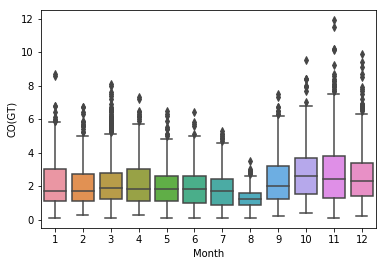

In [8]:
sns.boxplot(air_quality_data['Month'], air_quality_data['CO(GT)'])

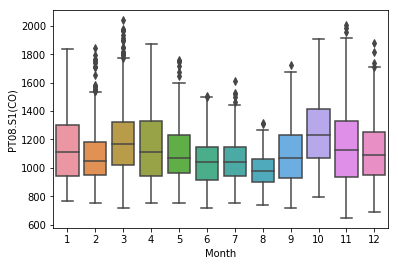

In [9]:
sns.boxplot(air_quality_data['Month'], air_quality_data['PT08.S1(CO)'])

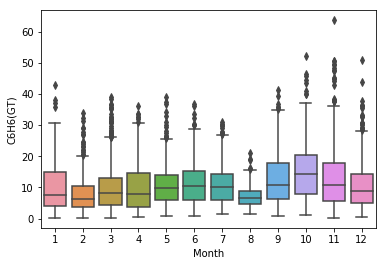

In [10]:
sns.boxplot(air_quality_data['Month'], air_quality_data['C6H6(GT)'])

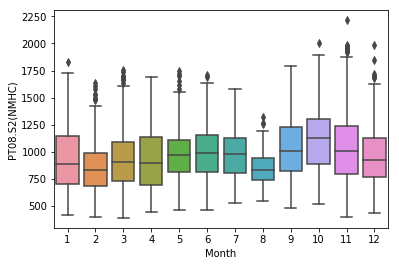

In [11]:
sns.boxplot(air_quality_data['Month'], air_quality_data['PT08.S2(NMHC)'])

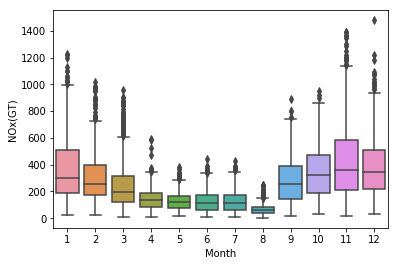

In [12]:
sns.boxplot(air_quality_data['Month'], air_quality_data['NOx(GT)'])

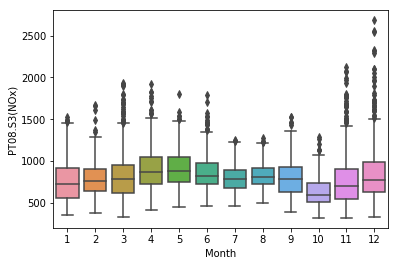

In [13]:
sns.boxplot(air_quality_data['Month'], air_quality_data['PT08.S3(NOx)'])

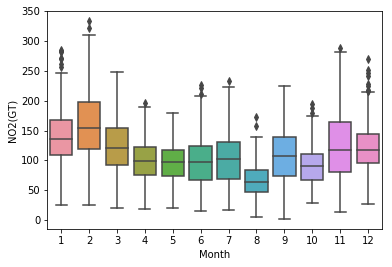

In [14]:
sns.boxplot(air_quality_data['Month'], air_quality_data['NO2(GT)'])

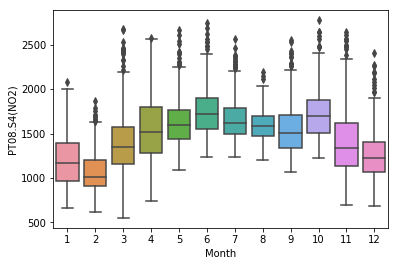

In [15]:
sns.boxplot(air_quality_data['Month'], air_quality_data['PT08.S4(NO2)'])

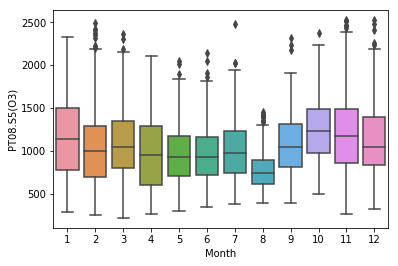

In [16]:
sns.boxplot(air_quality_data['Month'], air_quality_data['PT08.S5(O3)'])

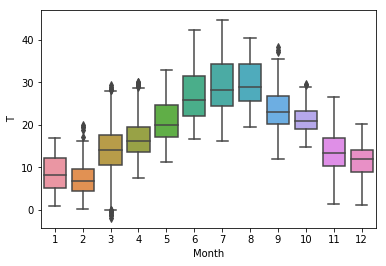

In [17]:
sns.boxplot(air_quality_data['Month'], air_quality_data['T'])

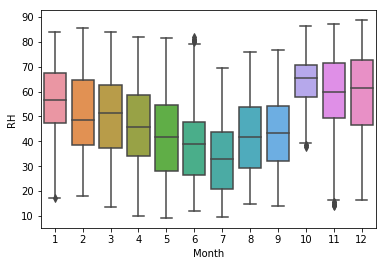

In [18]:
sns.boxplot(air_quality_data['Month'], air_quality_data['RH'])

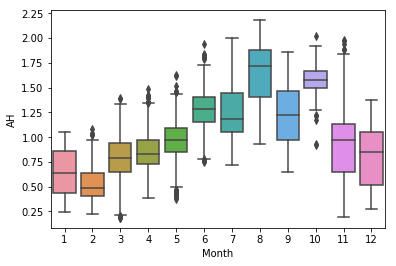

In [19]:
sns.boxplot(air_quality_data['Month'], air_quality_data['AH'])

#### Remove or impute any bad data.
My approach was to remove the outlier points by eliminating any points that were above (Mean + 2\*SD) and any points below (Mean - 2\*SD).

In [20]:
indexes = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
means = []
sds = []
for k in indexes:
    mean = air_quality_data[k].mean()
    sd = air_quality_data[k].std()
    means.append(mean)
    sds.append(sd)  
    
j = 0
for i in range(0, len(indexes)):
    while True:
        try:
            if ((means[i] - 2 * sds[i]) >= air_quality_data.loc[j, indexes[i]]) or ((means[i] + 2 * sds[i]) <= air_quality_data.loc[j, indexes[i]]):
                air_quality_data.drop(j, inplace = True, axis = 0)
                j -= 1
        except Exception as e:
            print(j, 'was deleted.')
        j += 1
        if j >= len(air_quality_data):
            j = 0
            break
    
air_quality_data

9 was deleted.
10 was deleted.
25 was deleted.
26 was deleted.
33 was deleted.
34 was deleted.
39 was deleted.
50 was deleted.


F:\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


53 was deleted.
57 was deleted.
58 was deleted.
81 was deleted.
82 was deleted.
98 was deleted.
105 was deleted.
106 was deleted.
110 was deleted.
111 was deleted.
112 was deleted.
120 was deleted.
121 was deleted.
122 was deleted.
129 was deleted.
130 was deleted.
136 was deleted.
147 was deleted.
153 was deleted.
154 was deleted.
159 was deleted.
169 was deleted.
170 was deleted.
171 was deleted.
177 was deleted.
178 was deleted.
183 was deleted.
193 was deleted.
194 was deleted.
201 was deleted.
202 was deleted.
207 was deleted.
225 was deleted.
226 was deleted.
249 was deleted.
250 was deleted.
273 was deleted.
274 was deleted.
297 was deleted.
298 was deleted.
321 was deleted.
322 was deleted.
333 was deleted.
345 was deleted.
361 was deleted.
369 was deleted.
393 was deleted.
394 was deleted.
417 was deleted.
441 was deleted.
465 was deleted.
466 was deleted.
489 was deleted.
513 was deleted.
518 was deleted.
524 was deleted.
525 was deleted.
526 was deleted.
529 was deleted.
537

2150 was deleted.
2158 was deleted.
2169 was deleted.
2174 was deleted.
2193 was deleted.
2194 was deleted.
2209 was deleted.
2217 was deleted.
2224 was deleted.
2225 was deleted.
2241 was deleted.
2265 was deleted.
2289 was deleted.
2290 was deleted.
2313 was deleted.
2337 was deleted.
2361 was deleted.
2362 was deleted.
2385 was deleted.
2409 was deleted.
2420 was deleted.
2421 was deleted.
2422 was deleted.
2423 was deleted.
2424 was deleted.
2425 was deleted.
2426 was deleted.
2427 was deleted.
2428 was deleted.
2429 was deleted.
2430 was deleted.
2431 was deleted.
2432 was deleted.
2433 was deleted.
2434 was deleted.
2435 was deleted.
2436 was deleted.
2437 was deleted.
2438 was deleted.
2439 was deleted.
2440 was deleted.
2441 was deleted.
2442 was deleted.
2443 was deleted.
2444 was deleted.
2445 was deleted.
2446 was deleted.
2447 was deleted.
2448 was deleted.
2449 was deleted.
2450 was deleted.
2451 was deleted.
2452 was deleted.
2453 was deleted.
2454 was deleted.
2455 was d

4214 was deleted.
4216 was deleted.
4217 was deleted.
4218 was deleted.
4219 was deleted.
4220 was deleted.
4221 was deleted.
4222 was deleted.
4223 was deleted.
4224 was deleted.
4225 was deleted.
4226 was deleted.
4227 was deleted.
4228 was deleted.
4229 was deleted.
4230 was deleted.
4231 was deleted.
4232 was deleted.
4233 was deleted.
4234 was deleted.
4235 was deleted.
4236 was deleted.
4237 was deleted.
4238 was deleted.
4239 was deleted.
4240 was deleted.
4241 was deleted.
4242 was deleted.
4243 was deleted.
4244 was deleted.
4245 was deleted.
4246 was deleted.
4247 was deleted.
4248 was deleted.
4249 was deleted.
4250 was deleted.
4251 was deleted.
4252 was deleted.
4253 was deleted.
4254 was deleted.
4255 was deleted.
4256 was deleted.
4257 was deleted.
4258 was deleted.
4259 was deleted.
4260 was deleted.
4261 was deleted.
4262 was deleted.
4263 was deleted.
4264 was deleted.
4265 was deleted.
4266 was deleted.
4267 was deleted.
4268 was deleted.
4269 was deleted.
4270 was d

5077 was deleted.
5080 was deleted.
5097 was deleted.
5121 was deleted.
5122 was deleted.
5145 was deleted.
5169 was deleted.
5175 was deleted.
5176 was deleted.
5177 was deleted.
5178 was deleted.
5179 was deleted.
5180 was deleted.
5181 was deleted.
5182 was deleted.
5183 was deleted.
5184 was deleted.
5185 was deleted.
5186 was deleted.
5187 was deleted.
5188 was deleted.
5189 was deleted.
5190 was deleted.
5191 was deleted.
5192 was deleted.
5193 was deleted.
5194 was deleted.
5195 was deleted.
5196 was deleted.
5197 was deleted.
5198 was deleted.
5201 was deleted.
5202 was deleted.
5203 was deleted.
5204 was deleted.
5205 was deleted.
5206 was deleted.
5207 was deleted.
5208 was deleted.
5209 was deleted.
5210 was deleted.
5211 was deleted.
5212 was deleted.
5213 was deleted.
5214 was deleted.
5215 was deleted.
5216 was deleted.
5217 was deleted.
5218 was deleted.
5219 was deleted.
5220 was deleted.
5221 was deleted.
5222 was deleted.
5223 was deleted.
5224 was deleted.
5225 was d

24 was deleted.
25 was deleted.
26 was deleted.
33 was deleted.
34 was deleted.
38 was deleted.
39 was deleted.
50 was deleted.
51 was deleted.
53 was deleted.
57 was deleted.
58 was deleted.
73 was deleted.
74 was deleted.
75 was deleted.
81 was deleted.
82 was deleted.
97 was deleted.
98 was deleted.
99 was deleted.
105 was deleted.
106 was deleted.
110 was deleted.
111 was deleted.
112 was deleted.
113 was deleted.
120 was deleted.
121 was deleted.
122 was deleted.
123 was deleted.
129 was deleted.
130 was deleted.
136 was deleted.
137 was deleted.
139 was deleted.
147 was deleted.
153 was deleted.
154 was deleted.
158 was deleted.
159 was deleted.
169 was deleted.
170 was deleted.
171 was deleted.
177 was deleted.
178 was deleted.
182 was deleted.
183 was deleted.
184 was deleted.
193 was deleted.
194 was deleted.
201 was deleted.
202 was deleted.
206 was deleted.
207 was deleted.
225 was deleted.
226 was deleted.
241 was deleted.
242 was deleted.
249 was deleted.
250 was deleted.


3153 was deleted.
3154 was deleted.
3155 was deleted.
3156 was deleted.
3157 was deleted.
3158 was deleted.
3159 was deleted.
3160 was deleted.
3161 was deleted.
3162 was deleted.
3163 was deleted.
3164 was deleted.
3165 was deleted.
3166 was deleted.
3167 was deleted.
3168 was deleted.
3169 was deleted.
3170 was deleted.
3171 was deleted.
3172 was deleted.
3173 was deleted.
3174 was deleted.
3175 was deleted.
3176 was deleted.
3177 was deleted.
3178 was deleted.
3179 was deleted.
3180 was deleted.
3181 was deleted.
3182 was deleted.
3183 was deleted.
3184 was deleted.
3185 was deleted.
3186 was deleted.
3187 was deleted.
3188 was deleted.
3189 was deleted.
3190 was deleted.
3191 was deleted.
3201 was deleted.
3206 was deleted.
3207 was deleted.
3225 was deleted.
3249 was deleted.
3273 was deleted.
3274 was deleted.
3297 was deleted.
3298 was deleted.
3299 was deleted.
3300 was deleted.
3301 was deleted.
3302 was deleted.
3303 was deleted.
3304 was deleted.
3305 was deleted.
3306 was d

4445 was deleted.
4446 was deleted.
4447 was deleted.
4448 was deleted.
4449 was deleted.
4450 was deleted.
4451 was deleted.
4452 was deleted.
4453 was deleted.
4454 was deleted.
4455 was deleted.
4456 was deleted.
4457 was deleted.
4458 was deleted.
4459 was deleted.
4460 was deleted.
4461 was deleted.
4462 was deleted.
4463 was deleted.
4464 was deleted.
4465 was deleted.
4466 was deleted.
4467 was deleted.
4468 was deleted.
4469 was deleted.
4470 was deleted.
4471 was deleted.
4472 was deleted.
4473 was deleted.
4474 was deleted.
4475 was deleted.
4476 was deleted.
4477 was deleted.
4478 was deleted.
4479 was deleted.
4488 was deleted.
4489 was deleted.
4496 was deleted.
4497 was deleted.
4498 was deleted.
4499 was deleted.
4500 was deleted.
4501 was deleted.
4502 was deleted.
4503 was deleted.
4504 was deleted.
4505 was deleted.
4506 was deleted.
4507 was deleted.
4508 was deleted.
4509 was deleted.
4510 was deleted.
4511 was deleted.
4512 was deleted.
4513 was deleted.
4514 was d

5400 was deleted.
5401 was deleted.
5402 was deleted.
5409 was deleted.
5410 was deleted.
5422 was deleted.
5423 was deleted.
5424 was deleted.
5425 was deleted.
5433 was deleted.
5434 was deleted.
5457 was deleted.
5458 was deleted.
5473 was deleted.
5481 was deleted.
5482 was deleted.
5494 was deleted.
5495 was deleted.
5496 was deleted.
5497 was deleted.
5498 was deleted.
5505 was deleted.
5506 was deleted.
5517 was deleted.
5518 was deleted.
5519 was deleted.
5520 was deleted.
5521 was deleted.
5529 was deleted.
5530 was deleted.
5553 was deleted.
5554 was deleted.
5567 was deleted.
5568 was deleted.
5577 was deleted.
5578 was deleted.
5587 was deleted.
5588 was deleted.
5601 was deleted.
5602 was deleted.
5625 was deleted.
5626 was deleted.
5640 was deleted.
5649 was deleted.
5650 was deleted.
5673 was deleted.
5674 was deleted.
5681 was deleted.
5683 was deleted.
5684 was deleted.
5685 was deleted.
5686 was deleted.
5687 was deleted.
5688 was deleted.
5689 was deleted.
5690 was d

1056 was deleted.
1057 was deleted.
1065 was deleted.
1066 was deleted.
1081 was deleted.
1089 was deleted.
1090 was deleted.
1113 was deleted.
1114 was deleted.
1137 was deleted.
1138 was deleted.
1161 was deleted.
1162 was deleted.
1165 was deleted.
1167 was deleted.
1176 was deleted.
1177 was deleted.
1178 was deleted.
1185 was deleted.
1186 was deleted.
1189 was deleted.
1190 was deleted.
1199 was deleted.
1200 was deleted.
1201 was deleted.
1209 was deleted.
1210 was deleted.
1225 was deleted.
1233 was deleted.
1234 was deleted.
1257 was deleted.
1258 was deleted.
1281 was deleted.
1282 was deleted.
1286 was deleted.
1305 was deleted.
1306 was deleted.
1309 was deleted.
1322 was deleted.
1329 was deleted.
1330 was deleted.
1334 was deleted.
1353 was deleted.
1354 was deleted.
1377 was deleted.
1378 was deleted.
1401 was deleted.
1402 was deleted.
1403 was deleted.
1404 was deleted.
1405 was deleted.
1406 was deleted.
1407 was deleted.
1408 was deleted.
1409 was deleted.
1410 was d

3230 was deleted.
3249 was deleted.
3273 was deleted.
3274 was deleted.
3297 was deleted.
3298 was deleted.
3299 was deleted.
3300 was deleted.
3301 was deleted.
3302 was deleted.
3303 was deleted.
3304 was deleted.
3305 was deleted.
3306 was deleted.
3307 was deleted.
3308 was deleted.
3309 was deleted.
3310 was deleted.
3311 was deleted.
3312 was deleted.
3313 was deleted.
3314 was deleted.
3315 was deleted.
3316 was deleted.
3317 was deleted.
3318 was deleted.
3319 was deleted.
3320 was deleted.
3321 was deleted.
3322 was deleted.
3323 was deleted.
3324 was deleted.
3325 was deleted.
3326 was deleted.
3327 was deleted.
3328 was deleted.
3329 was deleted.
3330 was deleted.
3331 was deleted.
3332 was deleted.
3333 was deleted.
3334 was deleted.
3335 was deleted.
3336 was deleted.
3337 was deleted.
3338 was deleted.
3339 was deleted.
3340 was deleted.
3341 was deleted.
3342 was deleted.
3343 was deleted.
3344 was deleted.
3345 was deleted.
3346 was deleted.
3347 was deleted.
3348 was d

4201 was deleted.
4209 was deleted.
4214 was deleted.
4216 was deleted.
4217 was deleted.
4218 was deleted.
4219 was deleted.
4220 was deleted.
4221 was deleted.
4222 was deleted.
4223 was deleted.
4224 was deleted.
4225 was deleted.
4226 was deleted.
4227 was deleted.
4228 was deleted.
4229 was deleted.
4230 was deleted.
4231 was deleted.
4232 was deleted.
4233 was deleted.
4234 was deleted.
4235 was deleted.
4236 was deleted.
4237 was deleted.
4238 was deleted.
4239 was deleted.
4240 was deleted.
4241 was deleted.
4242 was deleted.
4243 was deleted.
4244 was deleted.
4245 was deleted.
4246 was deleted.
4247 was deleted.
4248 was deleted.
4249 was deleted.
4250 was deleted.
4251 was deleted.
4252 was deleted.
4253 was deleted.
4254 was deleted.
4255 was deleted.
4256 was deleted.
4257 was deleted.
4258 was deleted.
4259 was deleted.
4260 was deleted.
4261 was deleted.
4262 was deleted.
4263 was deleted.
4264 was deleted.
4265 was deleted.
4266 was deleted.
4267 was deleted.
4268 was d

5151 was deleted.
5169 was deleted.
5175 was deleted.
5176 was deleted.
5177 was deleted.
5178 was deleted.
5179 was deleted.
5180 was deleted.
5181 was deleted.
5182 was deleted.
5183 was deleted.
5184 was deleted.
5185 was deleted.
5186 was deleted.
5187 was deleted.
5188 was deleted.
5189 was deleted.
5190 was deleted.
5191 was deleted.
5192 was deleted.
5193 was deleted.
5194 was deleted.
5195 was deleted.
5196 was deleted.
5197 was deleted.
5198 was deleted.
5201 was deleted.
5202 was deleted.
5203 was deleted.
5204 was deleted.
5205 was deleted.
5206 was deleted.
5207 was deleted.
5208 was deleted.
5209 was deleted.
5210 was deleted.
5211 was deleted.
5212 was deleted.
5213 was deleted.
5214 was deleted.
5215 was deleted.
5216 was deleted.
5217 was deleted.
5218 was deleted.
5219 was deleted.
5220 was deleted.
5221 was deleted.
5222 was deleted.
5223 was deleted.
5224 was deleted.
5225 was deleted.
5226 was deleted.
5227 was deleted.
5228 was deleted.
5229 was deleted.
5230 was d

1641 was deleted.
1642 was deleted.
1646 was deleted.
1657 was deleted.
1665 was deleted.
1666 was deleted.
1670 was deleted.
1689 was deleted.
1690 was deleted.
1694 was deleted.
1713 was deleted.
1714 was deleted.
1717 was deleted.
1718 was deleted.
1737 was deleted.
1738 was deleted.
1761 was deleted.
1762 was deleted.
1785 was deleted.
1786 was deleted.
1808 was deleted.
1809 was deleted.
1810 was deleted.
1821 was deleted.
1822 was deleted.
1823 was deleted.
1824 was deleted.
1825 was deleted.
1826 was deleted.
1827 was deleted.
1828 was deleted.
1829 was deleted.
1830 was deleted.
1831 was deleted.
1832 was deleted.
1833 was deleted.
1834 was deleted.
1835 was deleted.
1836 was deleted.
1837 was deleted.
1838 was deleted.
1839 was deleted.
1847 was deleted.
1848 was deleted.
1849 was deleted.
1850 was deleted.
1851 was deleted.
1852 was deleted.
1853 was deleted.
1854 was deleted.
1855 was deleted.
1856 was deleted.
1857 was deleted.
1858 was deleted.
1859 was deleted.
1860 was d

3516 was deleted.
3517 was deleted.
3518 was deleted.
3519 was deleted.
3520 was deleted.
3521 was deleted.
3522 was deleted.
3523 was deleted.
3524 was deleted.
3525 was deleted.
3526 was deleted.
3527 was deleted.
3528 was deleted.
3529 was deleted.
3530 was deleted.
3531 was deleted.
3532 was deleted.
3533 was deleted.
3534 was deleted.
3535 was deleted.
3536 was deleted.
3537 was deleted.
3538 was deleted.
3539 was deleted.
3540 was deleted.
3541 was deleted.
3542 was deleted.
3543 was deleted.
3544 was deleted.
3545 was deleted.
3546 was deleted.
3547 was deleted.
3548 was deleted.
3549 was deleted.
3550 was deleted.
3551 was deleted.
3552 was deleted.
3553 was deleted.
3554 was deleted.
3555 was deleted.
3556 was deleted.
3557 was deleted.
3558 was deleted.
3559 was deleted.
3560 was deleted.
3561 was deleted.
3562 was deleted.
3585 was deleted.
3609 was deleted.
3633 was deleted.
3634 was deleted.
3646 was deleted.
3647 was deleted.
3648 was deleted.
3649 was deleted.
3657 was d

4882 was deleted.
4883 was deleted.
4884 was deleted.
4885 was deleted.
4886 was deleted.
4887 was deleted.
4888 was deleted.
4889 was deleted.
4890 was deleted.
4895 was deleted.
4896 was deleted.
4897 was deleted.
4905 was deleted.
4910 was deleted.
4916 was deleted.
4919 was deleted.
4920 was deleted.
4921 was deleted.
4922 was deleted.
4923 was deleted.
4924 was deleted.
4925 was deleted.
4926 was deleted.
4927 was deleted.
4928 was deleted.
4929 was deleted.
4930 was deleted.
4931 was deleted.
4932 was deleted.
4933 was deleted.
4934 was deleted.
4935 was deleted.
4936 was deleted.
4937 was deleted.
4938 was deleted.
4939 was deleted.
4940 was deleted.
4941 was deleted.
4942 was deleted.
4943 was deleted.
4944 was deleted.
4945 was deleted.
4946 was deleted.
4947 was deleted.
4948 was deleted.
4949 was deleted.
4950 was deleted.
4951 was deleted.
4952 was deleted.
4953 was deleted.
4954 was deleted.
4955 was deleted.
4956 was deleted.
4957 was deleted.
4958 was deleted.
4959 was d

5818 was deleted.
5819 was deleted.
5832 was deleted.
5833 was deleted.
5834 was deleted.
5835 was deleted.
5836 was deleted.
5837 was deleted.
5838 was deleted.
5839 was deleted.
5840 was deleted.
5841 was deleted.
5842 was deleted.
5843 was deleted.
5844 was deleted.
5845 was deleted.
5846 was deleted.
5847 was deleted.
5848 was deleted.
5849 was deleted.
5850 was deleted.
5851 was deleted.
5852 was deleted.
5853 was deleted.
5854 was deleted.
5855 was deleted.
5856 was deleted.
5857 was deleted.
5858 was deleted.
5859 was deleted.
5860 was deleted.
5861 was deleted.
5862 was deleted.
5863 was deleted.
5864 was deleted.
5865 was deleted.
5889 was deleted.
5895 was deleted.
5896 was deleted.
5913 was deleted.
5914 was deleted.
5929 was deleted.
5937 was deleted.
5961 was deleted.
5963 was deleted.
5964 was deleted.
5965 was deleted.
5966 was deleted.
5967 was deleted.
5968 was deleted.
5969 was deleted.
5984 was deleted.
5985 was deleted.
5986 was deleted.
5987 was deleted.
6009 was d

1713 was deleted.
1714 was deleted.
1717 was deleted.
1718 was deleted.
1737 was deleted.
1738 was deleted.
1761 was deleted.
1762 was deleted.
1785 was deleted.
1786 was deleted.
1808 was deleted.
1809 was deleted.
1810 was deleted.
1821 was deleted.
1822 was deleted.
1823 was deleted.
1824 was deleted.
1825 was deleted.
1826 was deleted.
1827 was deleted.
1828 was deleted.
1829 was deleted.
1830 was deleted.
1831 was deleted.
1832 was deleted.
1833 was deleted.
1834 was deleted.
1835 was deleted.
1836 was deleted.
1837 was deleted.
1838 was deleted.
1839 was deleted.
1847 was deleted.
1848 was deleted.
1849 was deleted.
1850 was deleted.
1851 was deleted.
1852 was deleted.
1853 was deleted.
1854 was deleted.
1855 was deleted.
1856 was deleted.
1857 was deleted.
1858 was deleted.
1859 was deleted.
1860 was deleted.
1861 was deleted.
1862 was deleted.
1863 was deleted.
1864 was deleted.
1865 was deleted.
1866 was deleted.
1867 was deleted.
1868 was deleted.
1869 was deleted.
1870 was d

3609 was deleted.
3633 was deleted.
3634 was deleted.
3646 was deleted.
3647 was deleted.
3648 was deleted.
3649 was deleted.
3657 was deleted.
3681 was deleted.
3705 was deleted.
3706 was deleted.
3729 was deleted.
3753 was deleted.
3777 was deleted.
3778 was deleted.
3801 was deleted.
3825 was deleted.
3833 was deleted.
3834 was deleted.
3835 was deleted.
3836 was deleted.
3837 was deleted.
3838 was deleted.
3839 was deleted.
3840 was deleted.
3841 was deleted.
3842 was deleted.
3843 was deleted.
3844 was deleted.
3845 was deleted.
3846 was deleted.
3847 was deleted.
3848 was deleted.
3849 was deleted.
3850 was deleted.
3851 was deleted.
3852 was deleted.
3853 was deleted.
3854 was deleted.
3855 was deleted.
3856 was deleted.
3857 was deleted.
3858 was deleted.
3859 was deleted.
3860 was deleted.
3861 was deleted.
3873 was deleted.
3891 was deleted.
3892 was deleted.
3893 was deleted.
3894 was deleted.
3895 was deleted.
3896 was deleted.
3897 was deleted.
3898 was deleted.
3899 was d

4491 was deleted.
4496 was deleted.
4497 was deleted.
4498 was deleted.
4499 was deleted.
4500 was deleted.
4501 was deleted.
4502 was deleted.
4503 was deleted.
4504 was deleted.
4505 was deleted.
4506 was deleted.
4507 was deleted.
4508 was deleted.
4509 was deleted.
4510 was deleted.
4511 was deleted.
4512 was deleted.
4513 was deleted.
4514 was deleted.
4515 was deleted.
4516 was deleted.
4517 was deleted.
4518 was deleted.
4519 was deleted.
4520 was deleted.
4521 was deleted.
4522 was deleted.
4523 was deleted.
4524 was deleted.
4525 was deleted.
4526 was deleted.
4527 was deleted.
4528 was deleted.
4529 was deleted.
4530 was deleted.
4531 was deleted.
4532 was deleted.
4533 was deleted.
4534 was deleted.
4536 was deleted.
4537 was deleted.
4545 was deleted.
4564 was deleted.
4565 was deleted.
4569 was deleted.
4593 was deleted.
4594 was deleted.
4617 was deleted.
4641 was deleted.
4646 was deleted.
4647 was deleted.
4655 was deleted.
4656 was deleted.
4657 was deleted.
4665 was d

5560 was deleted.
5565 was deleted.
5566 was deleted.
5567 was deleted.
5568 was deleted.
5577 was deleted.
5578 was deleted.
5587 was deleted.
5588 was deleted.
5601 was deleted.
5602 was deleted.
5625 was deleted.
5626 was deleted.
5640 was deleted.
5649 was deleted.
5650 was deleted.
5673 was deleted.
5674 was deleted.
5681 was deleted.
5682 was deleted.
5683 was deleted.
5684 was deleted.
5685 was deleted.
5686 was deleted.
5687 was deleted.
5688 was deleted.
5689 was deleted.
5690 was deleted.
5691 was deleted.
5697 was deleted.
5698 was deleted.
5721 was deleted.
5728 was deleted.
5729 was deleted.
5730 was deleted.
5731 was deleted.
5732 was deleted.
5733 was deleted.
5734 was deleted.
5735 was deleted.
5736 was deleted.
5737 was deleted.
5738 was deleted.
5745 was deleted.
5751 was deleted.
5752 was deleted.
5753 was deleted.
5757 was deleted.
5758 was deleted.
5759 was deleted.
5760 was deleted.
5769 was deleted.
5793 was deleted.
5794 was deleted.
5817 was deleted.
5818 was d

632 was deleted.
633 was deleted.
637 was deleted.
638 was deleted.
656 was deleted.
657 was deleted.
658 was deleted.
659 was deleted.
681 was deleted.
682 was deleted.
686 was deleted.
697 was deleted.
701 was deleted.
702 was deleted.
703 was deleted.
704 was deleted.
705 was deleted.
706 was deleted.
707 was deleted.
708 was deleted.
709 was deleted.
710 was deleted.
711 was deleted.
712 was deleted.
713 was deleted.
714 was deleted.
715 was deleted.
716 was deleted.
717 was deleted.
718 was deleted.
719 was deleted.
720 was deleted.
721 was deleted.
722 was deleted.
723 was deleted.
724 was deleted.
729 was deleted.
753 was deleted.
754 was deleted.
764 was deleted.
765 was deleted.
766 was deleted.
774 was deleted.
775 was deleted.
776 was deleted.
777 was deleted.
778 was deleted.
779 was deleted.
780 was deleted.
781 was deleted.
782 was deleted.
787 was deleted.
788 was deleted.
797 was deleted.
798 was deleted.
799 was deleted.
800 was deleted.
801 was deleted.
802 was delete

1912 was deleted.
1916 was deleted.
1917 was deleted.
1929 was deleted.
1930 was deleted.
1934 was deleted.
1935 was deleted.
1936 was deleted.
1937 was deleted.
1939 was deleted.
1940 was deleted.
1941 was deleted.
1952 was deleted.
1953 was deleted.
1954 was deleted.
1955 was deleted.
1975 was deleted.
1976 was deleted.
1977 was deleted.
1978 was deleted.
1993 was deleted.
1999 was deleted.
2000 was deleted.
2001 was deleted.
2002 was deleted.
2003 was deleted.
2004 was deleted.
2005 was deleted.
2006 was deleted.
2007 was deleted.
2008 was deleted.
2009 was deleted.
2010 was deleted.
2011 was deleted.
2012 was deleted.
2013 was deleted.
2014 was deleted.
2015 was deleted.
2016 was deleted.
2017 was deleted.
2018 was deleted.
2019 was deleted.
2020 was deleted.
2021 was deleted.
2022 was deleted.
2023 was deleted.
2024 was deleted.
2025 was deleted.
2026 was deleted.
2027 was deleted.
2028 was deleted.
2029 was deleted.
2030 was deleted.
2031 was deleted.
2032 was deleted.
2033 was d

4070 was deleted.
4071 was deleted.
4072 was deleted.
4073 was deleted.
4074 was deleted.
4075 was deleted.
4076 was deleted.
4077 was deleted.
4078 was deleted.
4079 was deleted.
4080 was deleted.
4081 was deleted.
4082 was deleted.
4083 was deleted.
4084 was deleted.
4085 was deleted.
4086 was deleted.
4087 was deleted.
4088 was deleted.
4089 was deleted.
4100 was deleted.
4101 was deleted.
4102 was deleted.
4103 was deleted.
4104 was deleted.
4105 was deleted.
4106 was deleted.
4107 was deleted.
4108 was deleted.
4109 was deleted.
4110 was deleted.
4111 was deleted.
4112 was deleted.
4113 was deleted.
4114 was deleted.
4115 was deleted.
4116 was deleted.
4117 was deleted.
4118 was deleted.
4119 was deleted.
4120 was deleted.
4121 was deleted.
4122 was deleted.
4123 was deleted.
4124 was deleted.
4125 was deleted.
4126 was deleted.
4127 was deleted.
4128 was deleted.
4129 was deleted.
4130 was deleted.
4131 was deleted.
4132 was deleted.
4133 was deleted.
4134 was deleted.
4135 was d

5001 was deleted.
5002 was deleted.
5003 was deleted.
5004 was deleted.
5005 was deleted.
5006 was deleted.
5007 was deleted.
5008 was deleted.
5009 was deleted.
5010 was deleted.
5011 was deleted.
5012 was deleted.
5013 was deleted.
5014 was deleted.
5015 was deleted.
5016 was deleted.
5017 was deleted.
5018 was deleted.
5019 was deleted.
5020 was deleted.
5021 was deleted.
5022 was deleted.
5023 was deleted.
5024 was deleted.
5025 was deleted.
5026 was deleted.
5027 was deleted.
5028 was deleted.
5029 was deleted.
5030 was deleted.
5031 was deleted.
5032 was deleted.
5033 was deleted.
5034 was deleted.
5035 was deleted.
5036 was deleted.
5037 was deleted.
5038 was deleted.
5039 was deleted.
5040 was deleted.
5041 was deleted.
5042 was deleted.
5043 was deleted.
5044 was deleted.
5045 was deleted.
5046 was deleted.
5047 was deleted.
5048 was deleted.
5049 was deleted.
5050 was deleted.
5051 was deleted.
5052 was deleted.
5053 was deleted.
5054 was deleted.
5055 was deleted.
5056 was d

5988 was deleted.
6009 was deleted.
6010 was deleted.
6011 was deleted.
6012 was deleted.
6014 was deleted.
6015 was deleted.
6016 was deleted.
6017 was deleted.
6033 was deleted.
6041 was deleted.
6042 was deleted.
6043 was deleted.
6044 was deleted.
6045 was deleted.
6046 was deleted.
6047 was deleted.
6048 was deleted.
6049 was deleted.
6050 was deleted.
6051 was deleted.
6057 was deleted.
6062 was deleted.
6063 was deleted.
6064 was deleted.
6065 was deleted.
6066 was deleted.
6074 was deleted.
6081 was deleted.
6087 was deleted.
6088 was deleted.
6094 was deleted.
6095 was deleted.
6096 was deleted.
6097 was deleted.
6098 was deleted.
6100 was deleted.
6105 was deleted.
6106 was deleted.
6107 was deleted.
6120 was deleted.
6129 was deleted.
6133 was deleted.
6153 was deleted.
6154 was deleted.
6155 was deleted.
6158 was deleted.
6159 was deleted.
6160 was deleted.
6161 was deleted.
6162 was deleted.
6163 was deleted.
6164 was deleted.
6165 was deleted.
6166 was deleted.
6167 was d

964 was deleted.
965 was deleted.
966 was deleted.
967 was deleted.
968 was deleted.
969 was deleted.
970 was deleted.
971 was deleted.
972 was deleted.
973 was deleted.
974 was deleted.
975 was deleted.
976 was deleted.
977 was deleted.
978 was deleted.
979 was deleted.
980 was deleted.
981 was deleted.
982 was deleted.
983 was deleted.
984 was deleted.
985 was deleted.
986 was deleted.
987 was deleted.
988 was deleted.
989 was deleted.
990 was deleted.
991 was deleted.
992 was deleted.
993 was deleted.
994 was deleted.
995 was deleted.
996 was deleted.
997 was deleted.
998 was deleted.
999 was deleted.
1000 was deleted.
1001 was deleted.
1002 was deleted.
1003 was deleted.
1004 was deleted.
1005 was deleted.
1006 was deleted.
1007 was deleted.
1008 was deleted.
1009 was deleted.
1010 was deleted.
1011 was deleted.
1012 was deleted.
1013 was deleted.
1014 was deleted.
1015 was deleted.
1016 was deleted.
1017 was deleted.
1018 was deleted.
1019 was deleted.
1020 was deleted.
1021 was d

2687 was deleted.
2688 was deleted.
2697 was deleted.
2721 was deleted.
2722 was deleted.
2726 was deleted.
2745 was deleted.
2769 was deleted.
2793 was deleted.
2794 was deleted.
2798 was deleted.
2817 was deleted.
2822 was deleted.
2841 was deleted.
2845 was deleted.
2846 was deleted.
2856 was deleted.
2857 was deleted.
2865 was deleted.
2866 was deleted.
2881 was deleted.
2889 was deleted.
2894 was deleted.
2913 was deleted.
2937 was deleted.
2961 was deleted.
2962 was deleted.
2985 was deleted.
2990 was deleted.
3001 was deleted.
3009 was deleted.
3013 was deleted.
3014 was deleted.
3033 was deleted.
3034 was deleted.
3057 was deleted.
3062 was deleted.
3081 was deleted.
3105 was deleted.
3106 was deleted.
3129 was deleted.
3134 was deleted.
3138 was deleted.
3139 was deleted.
3140 was deleted.
3141 was deleted.
3142 was deleted.
3143 was deleted.
3144 was deleted.
3145 was deleted.
3146 was deleted.
3147 was deleted.
3148 was deleted.
3149 was deleted.
3150 was deleted.
3151 was d

4254 was deleted.
4255 was deleted.
4256 was deleted.
4257 was deleted.
4258 was deleted.
4259 was deleted.
4260 was deleted.
4261 was deleted.
4262 was deleted.
4263 was deleted.
4264 was deleted.
4265 was deleted.
4266 was deleted.
4267 was deleted.
4268 was deleted.
4269 was deleted.
4270 was deleted.
4271 was deleted.
4272 was deleted.
4273 was deleted.
4274 was deleted.
4275 was deleted.
4276 was deleted.
4277 was deleted.
4278 was deleted.
4279 was deleted.
4280 was deleted.
4281 was deleted.
4282 was deleted.
4283 was deleted.
4284 was deleted.
4285 was deleted.
4286 was deleted.
4287 was deleted.
4288 was deleted.
4289 was deleted.
4290 was deleted.
4291 was deleted.
4292 was deleted.
4293 was deleted.
4294 was deleted.
4295 was deleted.
4296 was deleted.
4297 was deleted.
4298 was deleted.
4299 was deleted.
4300 was deleted.
4301 was deleted.
4302 was deleted.
4303 was deleted.
4304 was deleted.
4305 was deleted.
4306 was deleted.
4307 was deleted.
4308 was deleted.
4309 was d

6040 was deleted.
6041 was deleted.
6042 was deleted.
6043 was deleted.
6044 was deleted.
6045 was deleted.
6046 was deleted.
6047 was deleted.
6048 was deleted.
6049 was deleted.
6050 was deleted.
6051 was deleted.
6057 was deleted.
6062 was deleted.
6063 was deleted.
6064 was deleted.
6065 was deleted.
6066 was deleted.
6070 was deleted.
6072 was deleted.
6073 was deleted.
6074 was deleted.
6081 was deleted.
6087 was deleted.
6088 was deleted.
6089 was deleted.
6093 was deleted.
6094 was deleted.
6095 was deleted.
6096 was deleted.
6097 was deleted.
6098 was deleted.
6100 was deleted.
6105 was deleted.
6106 was deleted.
6107 was deleted.
6111 was deleted.
6112 was deleted.
6120 was deleted.
6126 was deleted.
6129 was deleted.
6133 was deleted.
6153 was deleted.
6154 was deleted.
6155 was deleted.
6158 was deleted.
6159 was deleted.
6160 was deleted.
6161 was deleted.
6162 was deleted.
6163 was deleted.
6164 was deleted.
6165 was deleted.
6166 was deleted.
6167 was deleted.
6168 was d

1285 was deleted.
1286 was deleted.
1305 was deleted.
1306 was deleted.
1309 was deleted.
1310 was deleted.
1321 was deleted.
1322 was deleted.
1327 was deleted.
1328 was deleted.
1329 was deleted.
1330 was deleted.
1333 was deleted.
1334 was deleted.
1352 was deleted.
1353 was deleted.
1354 was deleted.
1355 was deleted.
1377 was deleted.
1378 was deleted.
1400 was deleted.
1401 was deleted.
1402 was deleted.
1403 was deleted.
1404 was deleted.
1405 was deleted.
1406 was deleted.
1407 was deleted.
1408 was deleted.
1409 was deleted.
1410 was deleted.
1411 was deleted.
1412 was deleted.
1413 was deleted.
1414 was deleted.
1415 was deleted.
1416 was deleted.
1417 was deleted.
1418 was deleted.
1419 was deleted.
1420 was deleted.
1421 was deleted.
1422 was deleted.
1423 was deleted.
1424 was deleted.
1425 was deleted.
1426 was deleted.
1427 was deleted.
1428 was deleted.
1429 was deleted.
1430 was deleted.
1431 was deleted.
1432 was deleted.
1433 was deleted.
1434 was deleted.
1435 was d

3038 was deleted.
3057 was deleted.
3062 was deleted.
3081 was deleted.
3105 was deleted.
3106 was deleted.
3129 was deleted.
3134 was deleted.
3138 was deleted.
3139 was deleted.
3140 was deleted.
3141 was deleted.
3142 was deleted.
3143 was deleted.
3144 was deleted.
3145 was deleted.
3146 was deleted.
3147 was deleted.
3148 was deleted.
3149 was deleted.
3150 was deleted.
3151 was deleted.
3152 was deleted.
3153 was deleted.
3154 was deleted.
3155 was deleted.
3156 was deleted.
3157 was deleted.
3158 was deleted.
3159 was deleted.
3160 was deleted.
3161 was deleted.
3162 was deleted.
3163 was deleted.
3164 was deleted.
3165 was deleted.
3166 was deleted.
3167 was deleted.
3168 was deleted.
3169 was deleted.
3170 was deleted.
3171 was deleted.
3172 was deleted.
3173 was deleted.
3174 was deleted.
3175 was deleted.
3176 was deleted.
3177 was deleted.
3178 was deleted.
3179 was deleted.
3180 was deleted.
3181 was deleted.
3182 was deleted.
3183 was deleted.
3184 was deleted.
3185 was d

4110 was deleted.
4111 was deleted.
4112 was deleted.
4113 was deleted.
4114 was deleted.
4115 was deleted.
4116 was deleted.
4117 was deleted.
4118 was deleted.
4119 was deleted.
4120 was deleted.
4121 was deleted.
4122 was deleted.
4123 was deleted.
4124 was deleted.
4125 was deleted.
4126 was deleted.
4127 was deleted.
4128 was deleted.
4129 was deleted.
4130 was deleted.
4131 was deleted.
4132 was deleted.
4133 was deleted.
4134 was deleted.
4135 was deleted.
4136 was deleted.
4137 was deleted.
4138 was deleted.
4139 was deleted.
4140 was deleted.
4141 was deleted.
4142 was deleted.
4143 was deleted.
4144 was deleted.
4145 was deleted.
4146 was deleted.
4147 was deleted.
4148 was deleted.
4149 was deleted.
4150 was deleted.
4151 was deleted.
4152 was deleted.
4153 was deleted.
4154 was deleted.
4155 was deleted.
4156 was deleted.
4157 was deleted.
4158 was deleted.
4159 was deleted.
4160 was deleted.
4161 was deleted.
4162 was deleted.
4163 was deleted.
4164 was deleted.
4165 was d

6101 was deleted.
6102 was deleted.
6103 was deleted.
6104 was deleted.
6105 was deleted.
6106 was deleted.
6107 was deleted.
6111 was deleted.
6112 was deleted.
6120 was deleted.
6126 was deleted.
6129 was deleted.
6133 was deleted.
6153 was deleted.
6154 was deleted.
6155 was deleted.
6158 was deleted.
6159 was deleted.
6160 was deleted.
6161 was deleted.
6162 was deleted.
6163 was deleted.
6164 was deleted.
6165 was deleted.
6166 was deleted.
6167 was deleted.
6168 was deleted.
6169 was deleted.
6170 was deleted.
6171 was deleted.
6177 was deleted.
6178 was deleted.
6182 was deleted.
6183 was deleted.
6184 was deleted.
6185 was deleted.
6186 was deleted.
6187 was deleted.
6188 was deleted.
6189 was deleted.
6190 was deleted.
6191 was deleted.
6192 was deleted.
6193 was deleted.
6194 was deleted.
6195 was deleted.
6196 was deleted.
6197 was deleted.
6198 was deleted.
6201 was deleted.
6206 was deleted.
6207 was deleted.
6208 was deleted.
6215 was deleted.
6216 was deleted.
6217 was d

1305 was deleted.
1306 was deleted.
1309 was deleted.
1310 was deleted.
1321 was deleted.
1322 was deleted.
1327 was deleted.
1328 was deleted.
1329 was deleted.
1330 was deleted.
1333 was deleted.
1334 was deleted.
1352 was deleted.
1353 was deleted.
1354 was deleted.
1355 was deleted.
1377 was deleted.
1378 was deleted.
1400 was deleted.
1401 was deleted.
1402 was deleted.
1403 was deleted.
1404 was deleted.
1405 was deleted.
1406 was deleted.
1407 was deleted.
1408 was deleted.
1409 was deleted.
1410 was deleted.
1411 was deleted.
1412 was deleted.
1413 was deleted.
1414 was deleted.
1415 was deleted.
1416 was deleted.
1417 was deleted.
1418 was deleted.
1419 was deleted.
1420 was deleted.
1421 was deleted.
1422 was deleted.
1423 was deleted.
1424 was deleted.
1425 was deleted.
1426 was deleted.
1427 was deleted.
1428 was deleted.
1429 was deleted.
1430 was deleted.
1431 was deleted.
1432 was deleted.
1433 was deleted.
1434 was deleted.
1435 was deleted.
1436 was deleted.
1437 was d

4393 was deleted.
4401 was deleted.
4406 was deleted.
4423 was deleted.
4424 was deleted.
4425 was deleted.
4426 was deleted.
4427 was deleted.
4428 was deleted.
4429 was deleted.
4430 was deleted.
4431 was deleted.
4432 was deleted.
4433 was deleted.
4434 was deleted.
4435 was deleted.
4436 was deleted.
4437 was deleted.
4438 was deleted.
4439 was deleted.
4440 was deleted.
4441 was deleted.
4442 was deleted.
4443 was deleted.
4444 was deleted.
4445 was deleted.
4446 was deleted.
4447 was deleted.
4448 was deleted.
4449 was deleted.
4450 was deleted.
4451 was deleted.
4452 was deleted.
4453 was deleted.
4454 was deleted.
4455 was deleted.
4456 was deleted.
4457 was deleted.
4458 was deleted.
4459 was deleted.
4460 was deleted.
4461 was deleted.
4462 was deleted.
4463 was deleted.
4464 was deleted.
4465 was deleted.
4466 was deleted.
4467 was deleted.
4468 was deleted.
4469 was deleted.
4470 was deleted.
4471 was deleted.
4472 was deleted.
4473 was deleted.
4474 was deleted.
4475 was d

5601 was deleted.
5602 was deleted.
5625 was deleted.
5626 was deleted.
5640 was deleted.
5646 was deleted.
5647 was deleted.
5648 was deleted.
5649 was deleted.
5650 was deleted.
5673 was deleted.
5674 was deleted.
5681 was deleted.
5682 was deleted.
5683 was deleted.
5684 was deleted.
5685 was deleted.
5686 was deleted.
5687 was deleted.
5688 was deleted.
5689 was deleted.
5690 was deleted.
5691 was deleted.
5697 was deleted.
5698 was deleted.
5721 was deleted.
5728 was deleted.
5729 was deleted.
5730 was deleted.
5731 was deleted.
5732 was deleted.
5733 was deleted.
5734 was deleted.
5735 was deleted.
5736 was deleted.
5737 was deleted.
5738 was deleted.
5745 was deleted.
5751 was deleted.
5752 was deleted.
5753 was deleted.
5757 was deleted.
5758 was deleted.
5759 was deleted.
5760 was deleted.
5769 was deleted.
5793 was deleted.
5794 was deleted.
5796 was deleted.
5797 was deleted.
5817 was deleted.
5818 was deleted.
5819 was deleted.
5820 was deleted.
5832 was deleted.
5833 was d

1855 was deleted.
1856 was deleted.
1857 was deleted.
1858 was deleted.
1859 was deleted.
1860 was deleted.
1861 was deleted.
1862 was deleted.
1863 was deleted.
1864 was deleted.
1865 was deleted.
1866 was deleted.
1867 was deleted.
1868 was deleted.
1869 was deleted.
1870 was deleted.
1871 was deleted.
1872 was deleted.
1873 was deleted.
1874 was deleted.
1875 was deleted.
1876 was deleted.
1877 was deleted.
1878 was deleted.
1879 was deleted.
1880 was deleted.
1881 was deleted.
1882 was deleted.
1883 was deleted.
1884 was deleted.
1885 was deleted.
1886 was deleted.
1887 was deleted.
1888 was deleted.
1889 was deleted.
1890 was deleted.
1891 was deleted.
1892 was deleted.
1905 was deleted.
1906 was deleted.
1907 was deleted.
1908 was deleted.
1911 was deleted.
1912 was deleted.
1916 was deleted.
1917 was deleted.
1929 was deleted.
1930 was deleted.
1934 was deleted.
1935 was deleted.
1936 was deleted.
1937 was deleted.
1939 was deleted.
1940 was deleted.
1941 was deleted.
1952 was d

3119 was deleted.
3120 was deleted.
3129 was deleted.
3134 was deleted.
3137 was deleted.
3138 was deleted.
3139 was deleted.
3140 was deleted.
3141 was deleted.
3142 was deleted.
3143 was deleted.
3144 was deleted.
3145 was deleted.
3146 was deleted.
3147 was deleted.
3148 was deleted.
3149 was deleted.
3150 was deleted.
3151 was deleted.
3152 was deleted.
3153 was deleted.
3154 was deleted.
3155 was deleted.
3156 was deleted.
3157 was deleted.
3158 was deleted.
3159 was deleted.
3160 was deleted.
3161 was deleted.
3162 was deleted.
3163 was deleted.
3164 was deleted.
3165 was deleted.
3166 was deleted.
3167 was deleted.
3168 was deleted.
3169 was deleted.
3170 was deleted.
3171 was deleted.
3172 was deleted.
3173 was deleted.
3174 was deleted.
3175 was deleted.
3176 was deleted.
3177 was deleted.
3178 was deleted.
3179 was deleted.
3180 was deleted.
3181 was deleted.
3182 was deleted.
3183 was deleted.
3184 was deleted.
3185 was deleted.
3186 was deleted.
3187 was deleted.
3188 was d

3982 was deleted.
3983 was deleted.
3993 was deleted.
4005 was deleted.
4006 was deleted.
4007 was deleted.
4017 was deleted.
4030 was deleted.
4041 was deleted.
4042 was deleted.
4044 was deleted.
4045 was deleted.
4046 was deleted.
4047 was deleted.
4048 was deleted.
4049 was deleted.
4050 was deleted.
4051 was deleted.
4052 was deleted.
4053 was deleted.
4054 was deleted.
4055 was deleted.
4056 was deleted.
4057 was deleted.
4058 was deleted.
4059 was deleted.
4060 was deleted.
4061 was deleted.
4062 was deleted.
4063 was deleted.
4064 was deleted.
4065 was deleted.
4066 was deleted.
4067 was deleted.
4068 was deleted.
4069 was deleted.
4070 was deleted.
4071 was deleted.
4072 was deleted.
4073 was deleted.
4074 was deleted.
4075 was deleted.
4076 was deleted.
4077 was deleted.
4078 was deleted.
4079 was deleted.
4080 was deleted.
4081 was deleted.
4082 was deleted.
4083 was deleted.
4084 was deleted.
4085 was deleted.
4086 was deleted.
4087 was deleted.
4088 was deleted.
4089 was d

5299 was deleted.
5300 was deleted.
5301 was deleted.
5302 was deleted.
5303 was deleted.
5304 was deleted.
5305 was deleted.
5306 was deleted.
5307 was deleted.
5308 was deleted.
5309 was deleted.
5310 was deleted.
5311 was deleted.
5312 was deleted.
5313 was deleted.
5314 was deleted.
5315 was deleted.
5316 was deleted.
5317 was deleted.
5318 was deleted.
5319 was deleted.
5320 was deleted.
5321 was deleted.
5322 was deleted.
5323 was deleted.
5324 was deleted.
5325 was deleted.
5326 was deleted.
5327 was deleted.
5328 was deleted.
5329 was deleted.
5330 was deleted.
5331 was deleted.
5332 was deleted.
5333 was deleted.
5334 was deleted.
5335 was deleted.
5336 was deleted.
5337 was deleted.
5338 was deleted.
5339 was deleted.
5340 was deleted.
5341 was deleted.
5342 was deleted.
5343 was deleted.
5344 was deleted.
5345 was deleted.
5346 was deleted.
5347 was deleted.
5348 was deleted.
5349 was deleted.
5350 was deleted.
5351 was deleted.
5352 was deleted.
5353 was deleted.
5354 was d

1039 was deleted.
1040 was deleted.
1041 was deleted.
1042 was deleted.
1046 was deleted.
1047 was deleted.
1054 was deleted.
1055 was deleted.
1056 was deleted.
1057 was deleted.
1065 was deleted.
1066 was deleted.
1081 was deleted.
1089 was deleted.
1090 was deleted.
1091 was deleted.
1092 was deleted.
1093 was deleted.
1094 was deleted.
1095 was deleted.
1096 was deleted.
1099 was deleted.
1100 was deleted.
1101 was deleted.
1111 was deleted.
1112 was deleted.
1113 was deleted.
1114 was deleted.
1115 was deleted.
1134 was deleted.
1135 was deleted.
1136 was deleted.
1137 was deleted.
1138 was deleted.
1161 was deleted.
1162 was deleted.
1165 was deleted.
1167 was deleted.
1176 was deleted.
1177 was deleted.
1178 was deleted.
1185 was deleted.
1186 was deleted.
1189 was deleted.
1190 was deleted.
1199 was deleted.
1200 was deleted.
1201 was deleted.
1209 was deleted.
1210 was deleted.
1224 was deleted.
1225 was deleted.
1233 was deleted.
1234 was deleted.
1257 was deleted.
1258 was d

2442 was deleted.
2443 was deleted.
2444 was deleted.
2445 was deleted.
2446 was deleted.
2447 was deleted.
2448 was deleted.
2449 was deleted.
2450 was deleted.
2451 was deleted.
2452 was deleted.
2453 was deleted.
2454 was deleted.
2455 was deleted.
2456 was deleted.
2457 was deleted.
2458 was deleted.
2481 was deleted.
2482 was deleted.
2486 was deleted.
2505 was deleted.
2506 was deleted.
2509 was deleted.
2529 was deleted.
2542 was deleted.
2547 was deleted.
2553 was deleted.
2564 was deleted.
2565 was deleted.
2566 was deleted.
2577 was deleted.
2578 was deleted.
2586 was deleted.
2587 was deleted.
2588 was deleted.
2589 was deleted.
2590 was deleted.
2601 was deleted.
2610 was deleted.
2611 was deleted.
2612 was deleted.
2613 was deleted.
2614 was deleted.
2615 was deleted.
2616 was deleted.
2625 was deleted.
2629 was deleted.
2630 was deleted.
2631 was deleted.
2633 was deleted.
2634 was deleted.
2635 was deleted.
2636 was deleted.
2637 was deleted.
2638 was deleted.
2639 was d

4140 was deleted.
4141 was deleted.
4142 was deleted.
4143 was deleted.
4144 was deleted.
4145 was deleted.
4146 was deleted.
4147 was deleted.
4148 was deleted.
4149 was deleted.
4150 was deleted.
4151 was deleted.
4152 was deleted.
4153 was deleted.
4154 was deleted.
4155 was deleted.
4156 was deleted.
4157 was deleted.
4158 was deleted.
4159 was deleted.
4160 was deleted.
4161 was deleted.
4162 was deleted.
4163 was deleted.
4164 was deleted.
4165 was deleted.
4166 was deleted.
4167 was deleted.
4168 was deleted.
4169 was deleted.
4170 was deleted.
4171 was deleted.
4172 was deleted.
4185 was deleted.
4190 was deleted.
4198 was deleted.
4201 was deleted.
4209 was deleted.
4214 was deleted.
4216 was deleted.
4217 was deleted.
4218 was deleted.
4219 was deleted.
4220 was deleted.
4221 was deleted.
4222 was deleted.
4223 was deleted.
4224 was deleted.
4225 was deleted.
4226 was deleted.
4227 was deleted.
4228 was deleted.
4229 was deleted.
4230 was deleted.
4231 was deleted.
4232 was d

5371 was deleted.
5372 was deleted.
5373 was deleted.
5374 was deleted.
5375 was deleted.
5376 was deleted.
5377 was deleted.
5378 was deleted.
5385 was deleted.
5386 was deleted.
5395 was deleted.
5400 was deleted.
5401 was deleted.
5402 was deleted.
5409 was deleted.
5410 was deleted.
5414 was deleted.
5422 was deleted.
5423 was deleted.
5424 was deleted.
5425 was deleted.
5426 was deleted.
5433 was deleted.
5434 was deleted.
5457 was deleted.
5458 was deleted.
5473 was deleted.
5474 was deleted.
5481 was deleted.
5482 was deleted.
5493 was deleted.
5494 was deleted.
5495 was deleted.
5496 was deleted.
5497 was deleted.
5498 was deleted.
5505 was deleted.
5506 was deleted.
5514 was deleted.
5516 was deleted.
5517 was deleted.
5518 was deleted.
5519 was deleted.
5520 was deleted.
5521 was deleted.
5529 was deleted.
5530 was deleted.
5534 was deleted.
5553 was deleted.
5554 was deleted.
5558 was deleted.
5560 was deleted.
5565 was deleted.
5566 was deleted.
5567 was deleted.
5568 was d

1830 was deleted.
1831 was deleted.
1832 was deleted.
1833 was deleted.
1834 was deleted.
1835 was deleted.
1836 was deleted.
1837 was deleted.
1838 was deleted.
1839 was deleted.
1844 was deleted.
1845 was deleted.
1846 was deleted.
1847 was deleted.
1848 was deleted.
1849 was deleted.
1850 was deleted.
1851 was deleted.
1852 was deleted.
1853 was deleted.
1854 was deleted.
1855 was deleted.
1856 was deleted.
1857 was deleted.
1858 was deleted.
1859 was deleted.
1860 was deleted.
1861 was deleted.
1862 was deleted.
1863 was deleted.
1864 was deleted.
1865 was deleted.
1866 was deleted.
1867 was deleted.
1868 was deleted.
1869 was deleted.
1870 was deleted.
1871 was deleted.
1872 was deleted.
1873 was deleted.
1874 was deleted.
1875 was deleted.
1876 was deleted.
1877 was deleted.
1878 was deleted.
1879 was deleted.
1880 was deleted.
1881 was deleted.
1882 was deleted.
1883 was deleted.
1884 was deleted.
1885 was deleted.
1886 was deleted.
1887 was deleted.
1888 was deleted.
1889 was d

3270 was deleted.
3271 was deleted.
3273 was deleted.
3274 was deleted.
3275 was deleted.
3276 was deleted.
3297 was deleted.
3298 was deleted.
3299 was deleted.
3300 was deleted.
3301 was deleted.
3302 was deleted.
3303 was deleted.
3304 was deleted.
3305 was deleted.
3306 was deleted.
3307 was deleted.
3308 was deleted.
3309 was deleted.
3310 was deleted.
3311 was deleted.
3312 was deleted.
3313 was deleted.
3314 was deleted.
3315 was deleted.
3316 was deleted.
3317 was deleted.
3318 was deleted.
3319 was deleted.
3320 was deleted.
3321 was deleted.
3322 was deleted.
3323 was deleted.
3324 was deleted.
3325 was deleted.
3326 was deleted.
3327 was deleted.
3328 was deleted.
3329 was deleted.
3330 was deleted.
3331 was deleted.
3332 was deleted.
3333 was deleted.
3334 was deleted.
3335 was deleted.
3336 was deleted.
3337 was deleted.
3338 was deleted.
3339 was deleted.
3340 was deleted.
3341 was deleted.
3342 was deleted.
3343 was deleted.
3344 was deleted.
3345 was deleted.
3346 was d

3907 was deleted.
3908 was deleted.
3909 was deleted.
3910 was deleted.
3911 was deleted.
3912 was deleted.
3913 was deleted.
3914 was deleted.
3915 was deleted.
3916 was deleted.
3917 was deleted.
3918 was deleted.
3919 was deleted.
3920 was deleted.
3921 was deleted.
3922 was deleted.
3923 was deleted.
3924 was deleted.
3925 was deleted.
3926 was deleted.
3927 was deleted.
3928 was deleted.
3929 was deleted.
3930 was deleted.
3931 was deleted.
3932 was deleted.
3933 was deleted.
3934 was deleted.
3935 was deleted.
3936 was deleted.
3937 was deleted.
3938 was deleted.
3939 was deleted.
3940 was deleted.
3941 was deleted.
3942 was deleted.
3943 was deleted.
3944 was deleted.
3945 was deleted.
3946 was deleted.
3947 was deleted.
3948 was deleted.
3949 was deleted.
3950 was deleted.
3951 was deleted.
3952 was deleted.
3953 was deleted.
3954 was deleted.
3955 was deleted.
3956 was deleted.
3957 was deleted.
3958 was deleted.
3959 was deleted.
3960 was deleted.
3961 was deleted.
3962 was d

4994 was deleted.
4995 was deleted.
4996 was deleted.
4997 was deleted.
4998 was deleted.
4999 was deleted.
5000 was deleted.
5001 was deleted.
5002 was deleted.
5003 was deleted.
5004 was deleted.
5005 was deleted.
5006 was deleted.
5007 was deleted.
5008 was deleted.
5009 was deleted.
5010 was deleted.
5011 was deleted.
5012 was deleted.
5013 was deleted.
5014 was deleted.
5015 was deleted.
5016 was deleted.
5017 was deleted.
5018 was deleted.
5019 was deleted.
5020 was deleted.
5021 was deleted.
5022 was deleted.
5023 was deleted.
5024 was deleted.
5025 was deleted.
5026 was deleted.
5027 was deleted.
5028 was deleted.
5029 was deleted.
5030 was deleted.
5031 was deleted.
5032 was deleted.
5033 was deleted.
5034 was deleted.
5035 was deleted.
5036 was deleted.
5037 was deleted.
5038 was deleted.
5039 was deleted.
5040 was deleted.
5041 was deleted.
5042 was deleted.
5043 was deleted.
5044 was deleted.
5045 was deleted.
5046 was deleted.
5047 was deleted.
5048 was deleted.
5049 was d

Date  Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0    2004-03-10    18     2.6       1360.0      11.9         1046.0    166.0   
1    2004-03-10    19     2.0       1292.0       9.4          955.0    103.0   
2    2004-03-10    20     2.2       1402.0       9.0          939.0    131.0   
3    2004-03-10    21     2.2       1376.0       9.2          948.0    172.0   
4    2004-03-10    22     1.6       1272.0       6.5          836.0    131.0   
14   2004-03-11     8     2.0       1333.0       8.0          900.0    174.0   
15   2004-03-11     9     2.2       1351.0       9.5          960.0    129.0   
16   2004-03-11    10     1.7       1233.0       6.3          827.0    112.0   
18   2004-03-11    12     1.6       1236.0       5.2          774.0    104.0   
19   2004-03-11    13     1.9       1286.0       7.3          869.0    146.0   
20   2004-03-11    14     2.9       1371.0      11.5         1034.0    207.0   
21   2004-03-11    15     2.2       1310.0       8.8          933.0    184.0   
22   2004-03-11    16     2.2       1292.0       8.3          912.0    193.0   
23   2004-03-11    17     2.9       1383.0      11.2         1020.0    243.0   
27   2004-03-11    21     3.9       1313.0      12.8         1076.0    240.0   
30   2004-03-12     0     1.7       1080.0       5.9          805.0    122.0   
31   2004-03-12     1     1.9       1044.0       6.4          829.0    133.0   
40   2004-03-12    10     3.1       1350.0      14.0         1118.0    187.0   
41   2004-03-12    11     2.7       1263.0      11.6         1037.0    216.0   
42   2004-03-12    12     2.1       1206.0      10.2          986.0    143.0   
43   2004-03-12    13     2.5       1252.0      11.0         1016.0    160.0   
44   2004-03-12    14     2.7       1287.0      12.8         1078.0    163.0   
45   2004-03-12    15     2.9       1353.0      14.2         1122.0    190.0   
46   2004-03-12    16     2.8       1309.0      12.7         1073.0    178.0   
47   2004-03-12    17     2.4       1274.0      11.7         1041.0    150.0   
48   2004-03-12    18     3.9       1510.0      19.3         1277.0    206.0   
49   2004-03-12    19     3.7       1525.0      18.2         1246.0    202.0   
52   2004-03-12    22     3.5       1484.0      14.3         1127.0    253.0   
54   2004-03-13     0     2.7       1280.0       9.6          964.0    193.0   
55   2004-03-13     1     1.9       1196.0       7.4          873.0    139.0   
...         ...   ...     ...          ...       ...            ...      ...   
9326 2005-04-03     8     0.7        936.0       2.4          611.0    134.0   
9327 2005-04-03     9     1.2       1022.0       4.1          715.0    192.0   
9328 2005-04-03    10     1.4        970.0       3.4          677.0    166.0   
9329 2005-04-03    11     1.3       1000.0       5.3          779.0    171.0   
9330 2005-04-03    12     1.4        996.0       5.3          781.0    177.0   
9331 2005-04-03    13     1.0        928.0       3.8          701.0    119.0   
9332 2005-04-03    14     1.0        933.0       4.2          722.0    121.0   
9333 2005-04-03    15     1.1        956.0       5.4          783.0    142.0   
9334 2005-04-03    16     1.3        968.0       6.3          826.0    197.0   
9335 2005-04-03    17     1.4        953.0       6.1          817.0    242.0   
9336 2005-04-03    18     1.2       1015.0       4.6          743.0    190.0   
9337 2005-04-03    19     2.7       1248.0      11.1         1018.0    367.0   
9338 2005-04-03    20     2.5       1180.0       7.9          894.0    355.0   
9339 2005-04-03    21     1.5       1102.0       6.0          812.0    235.0   
9340 2005-04-03    22     1.6       1116.0       5.8          803.0    233.0   
9341 2005-04-03    23     1.2       1100.0       5.1          769.0    170.0   
9342 2005-04-04     0     0.9       1012.0       3.5          683.0    117.0   
9343 2005-04-04     1     0.6        944.0       1.9          579.0     70.0   
9344 2005-0

### 4. Check for overall plausibility and errors (e.g., typos, unreasonable ranges)  
I check the whole dataset and do not find error yet. It is overall plausible.

In [21]:
air_quality_data.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 14 columns):
Time             8 non-null float64
CO(GT)           8 non-null float64
PT08.S1(CO)      8 non-null float64
C6H6(GT)         8 non-null float64
PT08.S2(NMHC)    8 non-null float64
NOx(GT)          8 non-null float64
PT08.S3(NOx)     8 non-null float64
NO2(GT)          8 non-null float64
PT08.S4(NO2)     8 non-null float64
PT08.S5(O3)      8 non-null float64
T                8 non-null float64
RH               8 non-null float64
AH               8 non-null float64
Month            8 non-null float64
dtypes: float64(14)
memory usage: 960.0+ bytes


In [22]:
air_quality_data.describe().T

count         mean         std       min         25%  \
Time           5831.0    11.924713    6.976289    0.0000     6.00000   
CO(GT)         5831.0     2.033013    1.187948    0.1000     1.10000   
PT08.S1(CO)    5831.0  1102.658035  191.149848  691.0000   956.50000   
C6H6(GT)       5831.0     9.608421    5.969737    0.2000     4.90000   
PT08.S2(NMHC)  5831.0   931.984222  226.964077  390.0000   758.50000   
NOx(GT)        5831.0   240.973589  180.665329   10.0000   110.00000   
PT08.S3(NOx)   5831.0   817.118676  222.640072  330.0000   661.00000   
NO2(GT)        5831.0   114.170468   45.157507   19.0000    82.00000   
PT08.S4(NO2)   5831.0  1401.494426  317.955248  551.0000  1172.00000   
PT08.S5(O3)    5831.0  1036.365975  364.243930  221.0000   774.00000   
T              5831.0    16.580089    8.037498   -1.9000    10.60000   
RH             5831.0    49.618127   16.885517    9.9000    36.30000   
AH             5831.0     0.938218    0.372909    0.1847     0.65985   
Month          5831.0     5.721660    3.552190    1.0000     3.00000   

                    50%         75%        max  
Time             12.000    18.00000    23.0000  
CO(GT)            1.800     2.70000     9.1000  
PT08.S1(CO)    1077.000  1228.00000  1846.0000  
C6H6(GT)          8.400    13.40000    43.0000  
PT08.S2(NMHC)   917.000  1098.00000  1831.0000  
NOx(GT)         188.000   323.00000  1230.0000  
PT08.S3(NOx)    797.000   947.00000  2683.0000  
NO2(GT)         110.000   140.00000   333.0000  
PT08.S4(NO2)   1417.000  1632.00000  2158.0000  
PT08.S5(O3)     999.000  1272.00000  2494.0000  
T                16.100    22.30000    35.4000  
RH               49.400    62.70000    88.7000  
AH                0.923     1.18835     1.7877  
Month             5.000     9.00000    12.0000

### 5. Identify highly correlated variables/ Are any of the columns correlated?
From above table, I find following correlations.  
  
Positive Correlated: CO(GT) & PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), NOx(GT), NO2(GT), PT08.S4(NO2), PT08.S5(O3); PT08.S1(CO) & C6H6(GT), PT08.S2(NMHC), NOx(GT), NO2(GT), PT08.S4(NO2), PT08.S5(O3); C6H6(GT) & PT08.S2(NMHC), NOx(GT), NO2(GT), PT08.S4(NO2), PT08.S5(O3); PT08.S2(NMHC) & NOx(GT), NO2(GT), PT08.S4(NO2), PT08.S5(O3); NOx(GT) & NO2(GT), PT08.S5(O3); NO2(GT) & PT08.S5(O3); PT08.S4(NO2) & T, AH; T & AH.  
  
Negative Correlated: CO(GT) & PT08.S3(NOx); PT08.S1(CO) & PT08.S3(NOx); C6H6(GT) & PT08.S3(NOx); PT08.S2(NMHC) & PT08.S3(NOx); NOx(GT) & PT08.S3(NOx); PT08.S3(NOx) & NO2(GT), PT08.S5(O3); T & RH.

In [23]:
air_quality_data.corr()

Time    CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
Time           1.000000  0.348196     0.276449  0.328051       0.353783   
CO(GT)         0.348196  1.000000     0.840415  0.907732       0.894281   
PT08.S1(CO)    0.276449  0.840415     1.000000  0.853003       0.856564   
C6H6(GT)       0.328051  0.907732     0.853003  1.000000       0.987214   
PT08.S2(NMHC)  0.353783  0.894281     0.856564  0.987214       1.000000   
NOx(GT)        0.209040  0.768186     0.683172  0.689196       0.672108   
PT08.S3(NOx)  -0.252422 -0.706352    -0.764868 -0.738034      -0.769035   
NO2(GT)        0.339763  0.675266     0.605991  0.584838       0.596160   
PT08.S4(NO2)   0.177761  0.530978     0.598751  0.705833       0.724059   
PT08.S5(O3)    0.189874  0.827322     0.877462  0.841754       0.847084   
T              0.168588  0.035617     0.050268  0.242693       0.275936   
RH            -0.276445 -0.011973     0.128202 -0.100721      -0.114325   
AH            -0.045272  0.004334     0.122760  0.165738       0.186162   
Month         -0.030118  0.025607    -0.125990  0.062860       0.077755   

                NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
Time           0.209040     -0.252422  0.339763      0.177761     0.189874   
CO(GT)         0.768186     -0.706352  0.675266      0.530978     0.827322   
PT08.S1(CO)    0.683172     -0.764868  0.605991      0.598751     0.877462   
C6H6(GT)       0.689196     -0.738034  0.584838      0.705833     0.841754   
PT08.S2(NMHC)  0.672108     -0.769035  0.596160      0.724059     0.847084   
NOx(GT)        1.000000     -0.691127  0.774733      0.115571     0.777827   
PT08.S3(NOx)  -0.691127      1.000000 -0.628416     -0.437079    -0.789653   
NO2(GT)        0.774733     -0.628416  1.000000      0.032429     0.675426   
PT08.S4(NO2)   0.115571     -0.437079  0.032429      1.000000     0.492267   
PT08.S5(O3)    0.777827     -0.789653  0.675426      0.492267     1.000000   
T             -0.285811     -0.084010 -0.259927      0.645570    -0.032602   
RH             0.168028     -0.101386 -0.109602     -0.028409     0.127089   
AH            -0.195777     -0.175730 -0.412443      0.677102     0.053716   
Month          0.009040      0.039316 -0.279012      0.170508    -0.011948   

                      T        RH        AH     Month  
Time           0.168588 -0.276445 -0.045272 -0.030118  
CO(GT)         0.035617 -0.011973  0.004334  0.025607  
PT08.S1(CO)    0.050268  0.128202  0.122760 -0.125990  
C6H6(GT)       0.242693 -0.100721  0.165738  0.062860  
PT08.S2(NMHC)  0.275936 -0.114325  0.186162  0.077755  
NOx(GT)       -0.285811  0.168028 -0.195777  0.009040  
PT08.S3(NOx)  -0.084010 -0.101386 -0.175730  0.039316  
NO2(GT)       -0.259927 -0.109602 -0.412443 -0.279012  
PT08.S4(NO2)   0.645570 -0.028409  0.677102  0.170508  
PT08.S5(O3)   -0.032602  0.127089  0.053716 -0.011948  
T              1.000000 -0.512115  0.674589  0.302700  
RH            -0.512115  1.000000  0.232060  0.088001  
AH             0.674589  0.232060  1.000000  0.434821  
Month          0.302700  0.088001  0.434821  1.000000

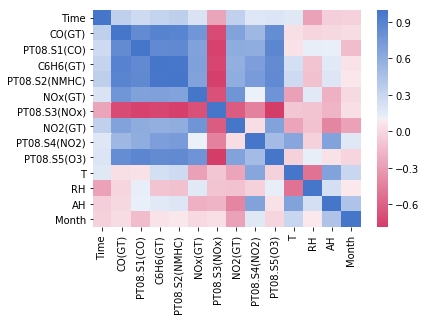

In [24]:
df = air_quality_data.corr()
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
sns.heatmap(df, cmap = cmap)

### 6. Identify variables with (nearly) no variance  
From the std(Standard deviation) of table below, I can find that AH is nearly no variance， which has 0.37 of standard deviation.

In [25]:
air_quality_data.describe().T

count         mean         std       min         25%  \
Time           5831.0    11.924713    6.976289    0.0000     6.00000   
CO(GT)         5831.0     2.033013    1.187948    0.1000     1.10000   
PT08.S1(CO)    5831.0  1102.658035  191.149848  691.0000   956.50000   
C6H6(GT)       5831.0     9.608421    5.969737    0.2000     4.90000   
PT08.S2(NMHC)  5831.0   931.984222  226.964077  390.0000   758.50000   
NOx(GT)        5831.0   240.973589  180.665329   10.0000   110.00000   
PT08.S3(NOx)   5831.0   817.118676  222.640072  330.0000   661.00000   
NO2(GT)        5831.0   114.170468   45.157507   19.0000    82.00000   
PT08.S4(NO2)   5831.0  1401.494426  317.955248  551.0000  1172.00000   
PT08.S5(O3)    5831.0  1036.365975  364.243930  221.0000   774.00000   
T              5831.0    16.580089    8.037498   -1.9000    10.60000   
RH             5831.0    49.618127   16.885517    9.9000    36.30000   
AH             5831.0     0.938218    0.372909    0.1847     0.65985   
Month          5831.0     5.721660    3.552190    1.0000     3.00000   

                    50%         75%        max  
Time             12.000    18.00000    23.0000  
CO(GT)            1.800     2.70000     9.1000  
PT08.S1(CO)    1077.000  1228.00000  1846.0000  
C6H6(GT)          8.400    13.40000    43.0000  
PT08.S2(NMHC)   917.000  1098.00000  1831.0000  
NOx(GT)         188.000   323.00000  1230.0000  
PT08.S3(NOx)    797.000   947.00000  2683.0000  
NO2(GT)         110.000   140.00000   333.0000  
PT08.S4(NO2)   1417.000  1632.00000  2158.0000  
PT08.S5(O3)     999.000  1272.00000  2494.0000  
T                16.100    22.30000    35.4000  
RH               49.400    62.70000    88.7000  
AH                0.923     1.18835     1.7877  
Month             5.000     9.00000    12.0000

### 7. Identify variables with strange names or values  
I do not find any variables with strange names or values.

In [26]:
air_quality_data.describe().T

count         mean         std       min         25%  \
Time           5831.0    11.924713    6.976289    0.0000     6.00000   
CO(GT)         5831.0     2.033013    1.187948    0.1000     1.10000   
PT08.S1(CO)    5831.0  1102.658035  191.149848  691.0000   956.50000   
C6H6(GT)       5831.0     9.608421    5.969737    0.2000     4.90000   
PT08.S2(NMHC)  5831.0   931.984222  226.964077  390.0000   758.50000   
NOx(GT)        5831.0   240.973589  180.665329   10.0000   110.00000   
PT08.S3(NOx)   5831.0   817.118676  222.640072  330.0000   661.00000   
NO2(GT)        5831.0   114.170468   45.157507   19.0000    82.00000   
PT08.S4(NO2)   5831.0  1401.494426  317.955248  551.0000  1172.00000   
PT08.S5(O3)    5831.0  1036.365975  364.243930  221.0000   774.00000   
T              5831.0    16.580089    8.037498   -1.9000    10.60000   
RH             5831.0    49.618127   16.885517    9.9000    36.30000   
AH             5831.0     0.938218    0.372909    0.1847     0.65985   
Month          5831.0     5.721660    3.552190    1.0000     3.00000   

                    50%         75%        max  
Time             12.000    18.00000    23.0000  
CO(GT)            1.800     2.70000     9.1000  
PT08.S1(CO)    1077.000  1228.00000  1846.0000  
C6H6(GT)          8.400    13.40000    43.0000  
PT08.S2(NMHC)   917.000  1098.00000  1831.0000  
NOx(GT)         188.000   323.00000  1230.0000  
PT08.S3(NOx)    797.000   947.00000  2683.0000  
NO2(GT)         110.000   140.00000   333.0000  
PT08.S4(NO2)   1417.000  1632.00000  2158.0000  
PT08.S5(O3)     999.000  1272.00000  2494.0000  
T                16.100    22.30000    35.4000  
RH               49.400    62.70000    88.7000  
AH                0.923     1.18835     1.7877  
Month             5.000     9.00000    12.0000

### 8. Check variable classes (eg. Characters vs factors)

In [27]:
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5831 entries, 0 to 9356
Data columns (total 16 columns):
Date             5831 non-null datetime64[ns]
Time             5831 non-null int64
CO(GT)           5831 non-null float64
PT08.S1(CO)      5831 non-null float64
C6H6(GT)         5831 non-null float64
PT08.S2(NMHC)    5831 non-null float64
NOx(GT)          5831 non-null float64
PT08.S3(NOx)     5831 non-null float64
NO2(GT)          5831 non-null float64
PT08.S4(NO2)     5831 non-null float64
PT08.S5(O3)      5831 non-null float64
T                5831 non-null float64
RH               5831 non-null float64
AH               5831 non-null float64
Day              5831 non-null object
Month            5831 non-null int64
dtypes: datetime64[ns](1), float64(12), int64(2), object(1)
memory usage: 934.4+ KB


### 10. Rename some variables or values (if not all data is useful)

In [28]:
air_quality_data.rename(columns = {'T':'Temp'}, inplace = True)
air_quality_data

F:\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Date  Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0    2004-03-10    18     2.6       1360.0      11.9         1046.0    166.0   
1    2004-03-10    19     2.0       1292.0       9.4          955.0    103.0   
2    2004-03-10    20     2.2       1402.0       9.0          939.0    131.0   
3    2004-03-10    21     2.2       1376.0       9.2          948.0    172.0   
4    2004-03-10    22     1.6       1272.0       6.5          836.0    131.0   
14   2004-03-11     8     2.0       1333.0       8.0          900.0    174.0   
15   2004-03-11     9     2.2       1351.0       9.5          960.0    129.0   
16   2004-03-11    10     1.7       1233.0       6.3          827.0    112.0   
18   2004-03-11    12     1.6       1236.0       5.2          774.0    104.0   
19   2004-03-11    13     1.9       1286.0       7.3          869.0    146.0   
20   2004-03-11    14     2.9       1371.0      11.5         1034.0    207.0   
21   2004-03-11    15     2.2       1310.0       8.8          933.0    184.0   
22   2004-03-11    16     2.2       1292.0       8.3          912.0    193.0   
23   2004-03-11    17     2.9       1383.0      11.2         1020.0    243.0   
27   2004-03-11    21     3.9       1313.0      12.8         1076.0    240.0   
30   2004-03-12     0     1.7       1080.0       5.9          805.0    122.0   
31   2004-03-12     1     1.9       1044.0       6.4          829.0    133.0   
40   2004-03-12    10     3.1       1350.0      14.0         1118.0    187.0   
41   2004-03-12    11     2.7       1263.0      11.6         1037.0    216.0   
42   2004-03-12    12     2.1       1206.0      10.2          986.0    143.0   
43   2004-03-12    13     2.5       1252.0      11.0         1016.0    160.0   
44   2004-03-12    14     2.7       1287.0      12.8         1078.0    163.0   
45   2004-03-12    15     2.9       1353.0      14.2         1122.0    190.0   
46   2004-03-12    16     2.8       1309.0      12.7         1073.0    178.0   
47   2004-03-12    17     2.4       1274.0      11.7         1041.0    150.0   
48   2004-03-12    18     3.9       1510.0      19.3         1277.0    206.0   
49   2004-03-12    19     3.7       1525.0      18.2         1246.0    202.0   
52   2004-03-12    22     3.5       1484.0      14.3         1127.0    253.0   
54   2004-03-13     0     2.7       1280.0       9.6          964.0    193.0   
55   2004-03-13     1     1.9       1196.0       7.4          873.0    139.0   
...         ...   ...     ...          ...       ...            ...      ...   
9326 2005-04-03     8     0.7        936.0       2.4          611.0    134.0   
9327 2005-04-03     9     1.2       1022.0       4.1          715.0    192.0   
9328 2005-04-03    10     1.4        970.0       3.4          677.0    166.0   
9329 2005-04-03    11     1.3       1000.0       5.3          779.0    171.0   
9330 2005-04-03    12     1.4        996.0       5.3          781.0    177.0   
9331 2005-04-03    13     1.0        928.0       3.8          701.0    119.0   
9332 2005-04-03    14     1.0        933.0       4.2          722.0    121.0   
9333 2005-04-03    15     1.1        956.0       5.4          783.0    142.0   
9334 2005-04-03    16     1.3        968.0       6.3          826.0    197.0   
9335 2005-04-03    17     1.4        953.0       6.1          817.0    242.0   
9336 2005-04-03    18     1.2       1015.0       4.6          743.0    190.0   
9337 2005-04-03    19     2.7       1248.0      11.1         1018.0    367.0   
9338 2005-04-03    20     2.5       1180.0       7.9          894.0    355.0   
9339 2005-04-03    21     1.5       1102.0       6.0          812.0    235.0   
9340 2005-04-03    22     1.6       1116.0       5.8          803.0    233.0   
9341 2005-04-03    23     1.2       1100.0       5.1          769.0    170.0   
9342 2005-04-04     0     0.9       1012.0       3.5          683.0    117.0   
9343 2005-04-04     1     0.6        944.0       1.9          579.0     70.0   
9344 2005-0

### 11. Check some overall pattern (statistical/ numerical summaries)

In [29]:
air_quality_data.describe().T

count         mean         std       min         25%  \
Time           5831.0    11.924713    6.976289    0.0000     6.00000   
CO(GT)         5831.0     2.033013    1.187948    0.1000     1.10000   
PT08.S1(CO)    5831.0  1102.658035  191.149848  691.0000   956.50000   
C6H6(GT)       5831.0     9.608421    5.969737    0.2000     4.90000   
PT08.S2(NMHC)  5831.0   931.984222  226.964077  390.0000   758.50000   
NOx(GT)        5831.0   240.973589  180.665329   10.0000   110.00000   
PT08.S3(NOx)   5831.0   817.118676  222.640072  330.0000   661.00000   
NO2(GT)        5831.0   114.170468   45.157507   19.0000    82.00000   
PT08.S4(NO2)   5831.0  1401.494426  317.955248  551.0000  1172.00000   
PT08.S5(O3)    5831.0  1036.365975  364.243930  221.0000   774.00000   
Temp           5831.0    16.580089    8.037498   -1.9000    10.60000   
RH             5831.0    49.618127   16.885517    9.9000    36.30000   
AH             5831.0     0.938218    0.372909    0.1847     0.65985   
Month          5831.0     5.721660    3.552190    1.0000     3.00000   

                    50%         75%        max  
Time             12.000    18.00000    23.0000  
CO(GT)            1.800     2.70000     9.1000  
PT08.S1(CO)    1077.000  1228.00000  1846.0000  
C6H6(GT)          8.400    13.40000    43.0000  
PT08.S2(NMHC)   917.000  1098.00000  1831.0000  
NOx(GT)         188.000   323.00000  1230.0000  
PT08.S3(NOx)    797.000   947.00000  2683.0000  
NO2(GT)         110.000   140.00000   333.0000  
PT08.S4(NO2)   1417.000  1632.00000  2158.0000  
PT08.S5(O3)     999.000  1272.00000  2494.0000  
Temp             16.100    22.30000    35.4000  
RH               49.400    62.70000    88.7000  
AH                0.923     1.18835     1.7877  
Month             5.000     9.00000    12.0000

### 12. Possibly center/scale variables

In [30]:
air_quality_data.describe().T

count         mean         std       min         25%  \
Time           5831.0    11.924713    6.976289    0.0000     6.00000   
CO(GT)         5831.0     2.033013    1.187948    0.1000     1.10000   
PT08.S1(CO)    5831.0  1102.658035  191.149848  691.0000   956.50000   
C6H6(GT)       5831.0     9.608421    5.969737    0.2000     4.90000   
PT08.S2(NMHC)  5831.0   931.984222  226.964077  390.0000   758.50000   
NOx(GT)        5831.0   240.973589  180.665329   10.0000   110.00000   
PT08.S3(NOx)   5831.0   817.118676  222.640072  330.0000   661.00000   
NO2(GT)        5831.0   114.170468   45.157507   19.0000    82.00000   
PT08.S4(NO2)   5831.0  1401.494426  317.955248  551.0000  1172.00000   
PT08.S5(O3)    5831.0  1036.365975  364.243930  221.0000   774.00000   
Temp           5831.0    16.580089    8.037498   -1.9000    10.60000   
RH             5831.0    49.618127   16.885517    9.9000    36.30000   
AH             5831.0     0.938218    0.372909    0.1847     0.65985   
Month          5831.0     5.721660    3.552190    1.0000     3.00000   

                    50%         75%        max  
Time             12.000    18.00000    23.0000  
CO(GT)            1.800     2.70000     9.1000  
PT08.S1(CO)    1077.000  1228.00000  1846.0000  
C6H6(GT)          8.400    13.40000    43.0000  
PT08.S2(NMHC)   917.000  1098.00000  1831.0000  
NOx(GT)         188.000   323.00000  1230.0000  
PT08.S3(NOx)    797.000   947.00000  2683.0000  
NO2(GT)         110.000   140.00000   333.0000  
PT08.S4(NO2)   1417.000  1632.00000  2158.0000  
PT08.S5(O3)     999.000  1272.00000  2494.0000  
Temp             16.100    22.30000    35.4000  
RH               49.400    62.70000    88.7000  
AH                0.923     1.18835     1.7877  
Month             5.000     9.00000    12.0000

## Exploratory Data Analysis checklist
Suggest hypotheses about the causes of observed phenomena：  
1. Assess assumptions on which statistical inference will be based  
2. Support the selection of appropriate statistical tools and techniques  
3. Provide a basis for further data collection through surveys or experiments  

### 1. Five number summaries (mean/median, min, max, q1, q3)  
From the table below, I can find five number summaries (mean/median, min, max, q1, q3).

In [31]:
air_quality_data.describe().T

count         mean         std       min         25%  \
Time           5831.0    11.924713    6.976289    0.0000     6.00000   
CO(GT)         5831.0     2.033013    1.187948    0.1000     1.10000   
PT08.S1(CO)    5831.0  1102.658035  191.149848  691.0000   956.50000   
C6H6(GT)       5831.0     9.608421    5.969737    0.2000     4.90000   
PT08.S2(NMHC)  5831.0   931.984222  226.964077  390.0000   758.50000   
NOx(GT)        5831.0   240.973589  180.665329   10.0000   110.00000   
PT08.S3(NOx)   5831.0   817.118676  222.640072  330.0000   661.00000   
NO2(GT)        5831.0   114.170468   45.157507   19.0000    82.00000   
PT08.S4(NO2)   5831.0  1401.494426  317.955248  551.0000  1172.00000   
PT08.S5(O3)    5831.0  1036.365975  364.243930  221.0000   774.00000   
Temp           5831.0    16.580089    8.037498   -1.9000    10.60000   
RH             5831.0    49.618127   16.885517    9.9000    36.30000   
AH             5831.0     0.938218    0.372909    0.1847     0.65985   
Month          5831.0     5.721660    3.552190    1.0000     3.00000   

                    50%         75%        max  
Time             12.000    18.00000    23.0000  
CO(GT)            1.800     2.70000     9.1000  
PT08.S1(CO)    1077.000  1228.00000  1846.0000  
C6H6(GT)          8.400    13.40000    43.0000  
PT08.S2(NMHC)   917.000  1098.00000  1831.0000  
NOx(GT)         188.000   323.00000  1230.0000  
PT08.S3(NOx)    797.000   947.00000  2683.0000  
NO2(GT)         110.000   140.00000   333.0000  
PT08.S4(NO2)   1417.000  1632.00000  2158.0000  
PT08.S5(O3)     999.000  1272.00000  2494.0000  
Temp             16.100    22.30000    35.4000  
RH               49.400    62.70000    88.7000  
AH                0.923     1.18835     1.7877  
Month             5.000     9.00000    12.0000

### 2. Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D088C589E8>,
      dtype=object)

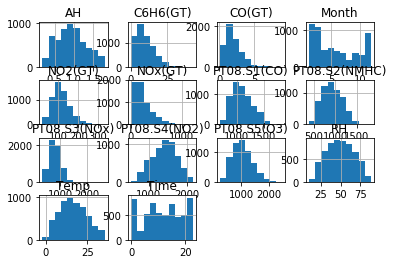

In [32]:
air_quality_data.hist()

### 3.Line charts

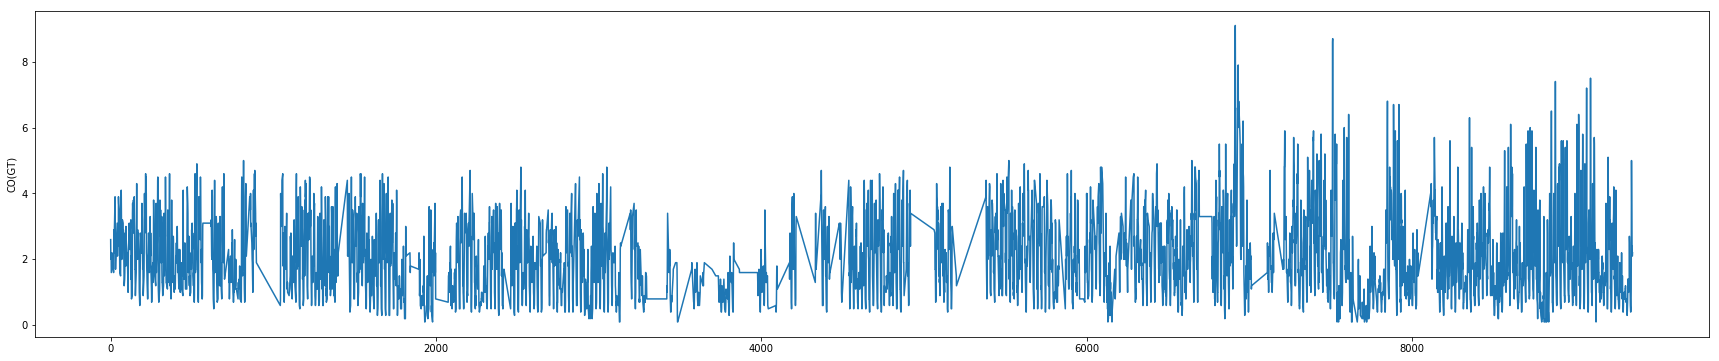

In [33]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['CO(GT)'])
plt.ylabel('CO(GT)')
plt.show()

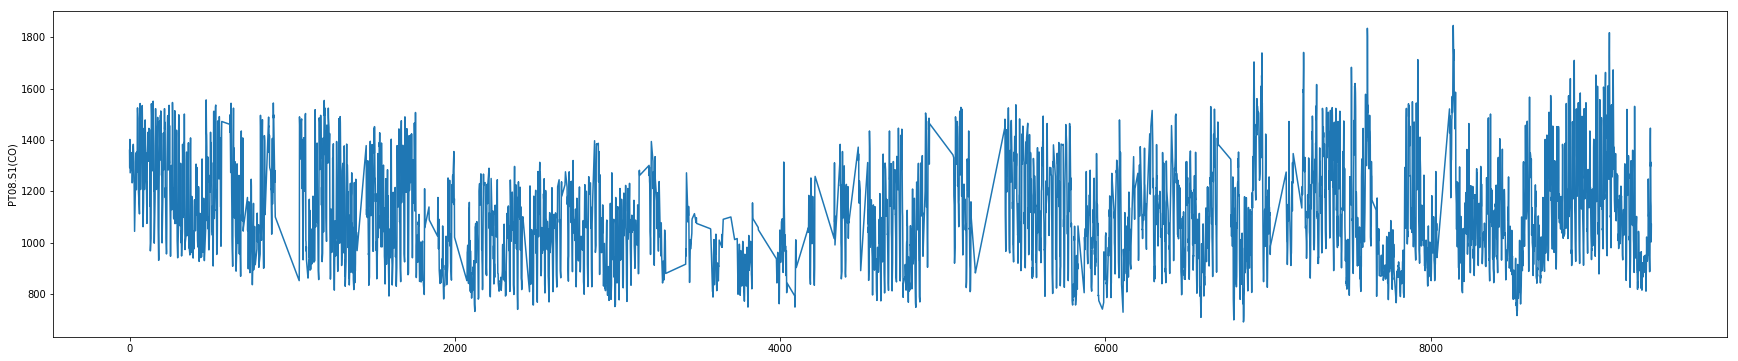

In [34]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['PT08.S1(CO)'])
plt.ylabel('PT08.S1(CO)')
plt.show()

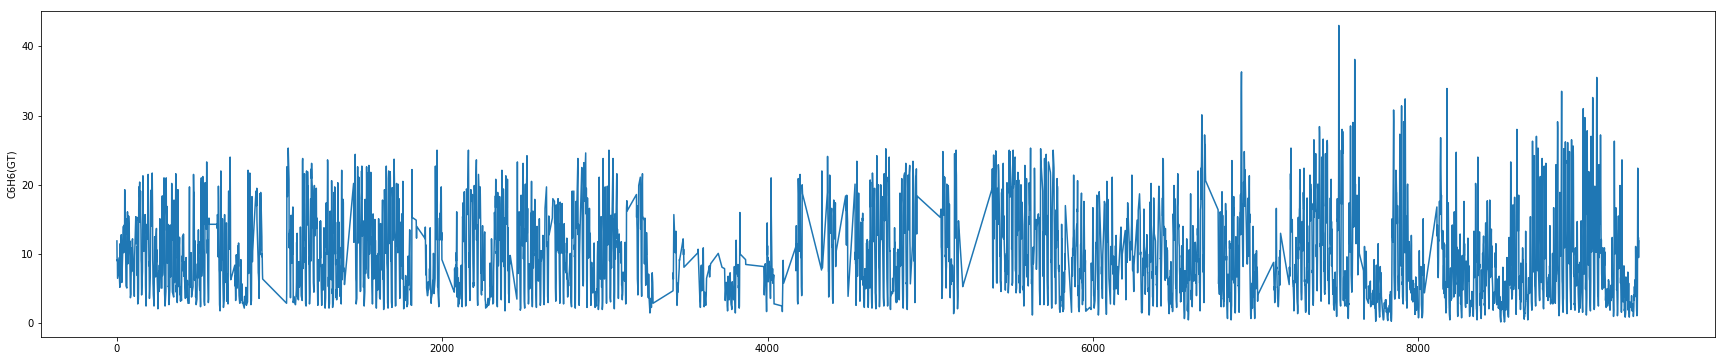

In [35]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['C6H6(GT)'])
plt.ylabel('C6H6(GT)')
plt.show()

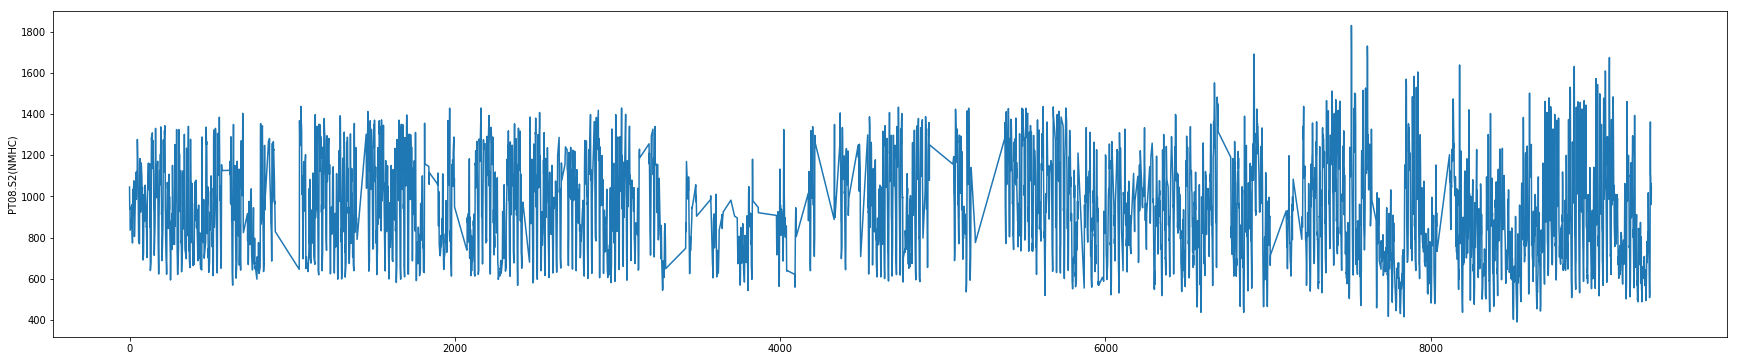

In [36]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['PT08.S2(NMHC)'])
plt.ylabel('PT08.S2(NMHC)')
plt.show()

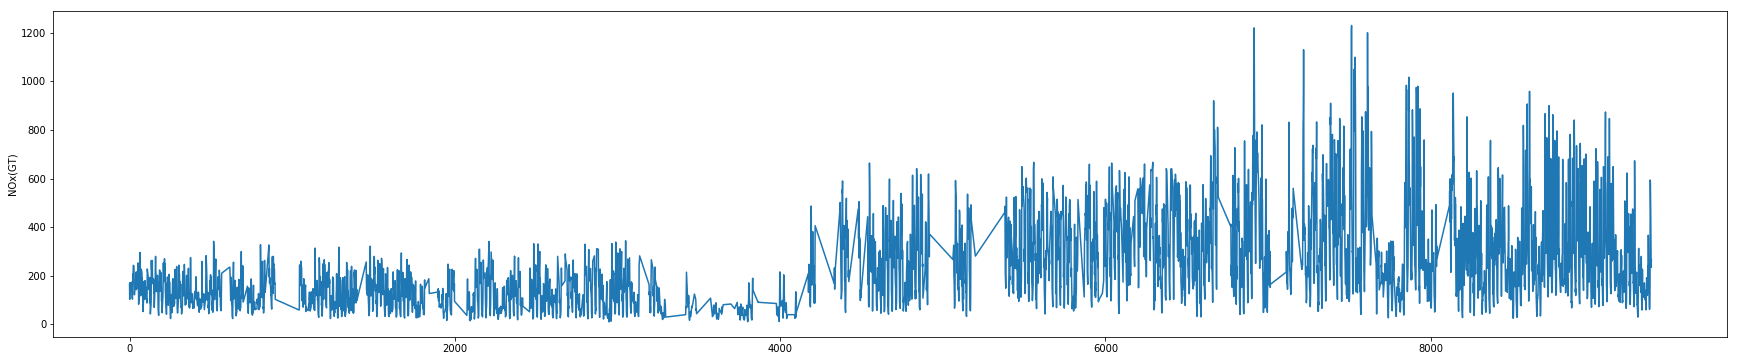

In [37]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['NOx(GT)'])
plt.ylabel('NOx(GT)')
plt.show()

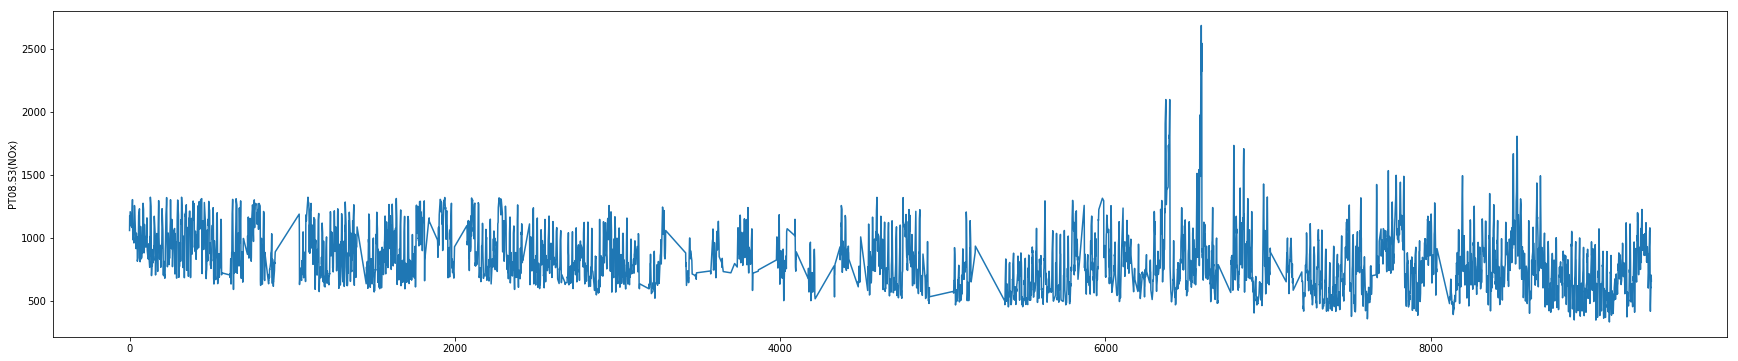

In [38]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['PT08.S3(NOx)'])
plt.ylabel('PT08.S3(NOx)')
plt.show()

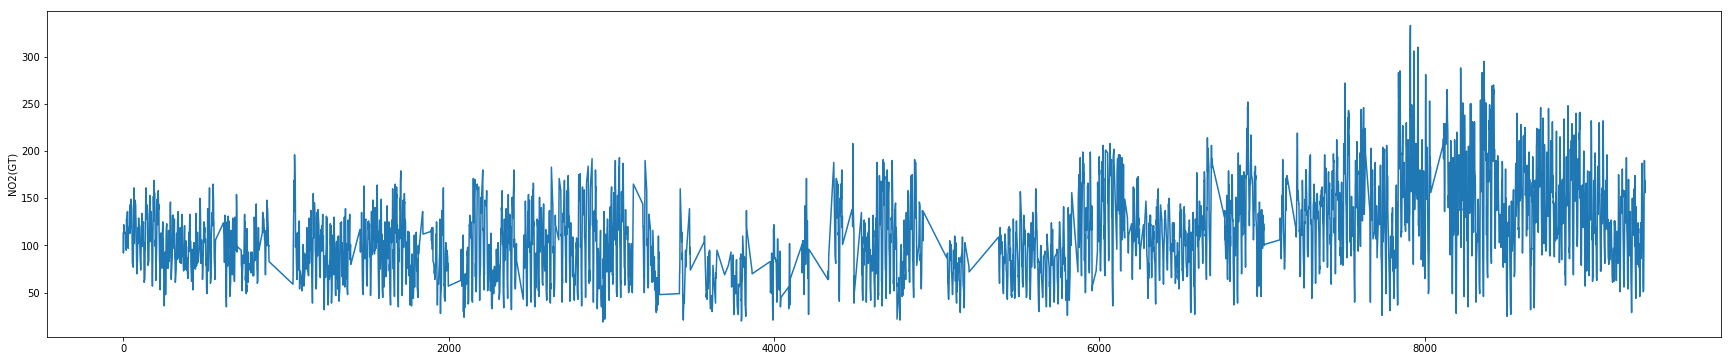

In [39]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['NO2(GT)'])
plt.ylabel('NO2(GT)')
plt.show()

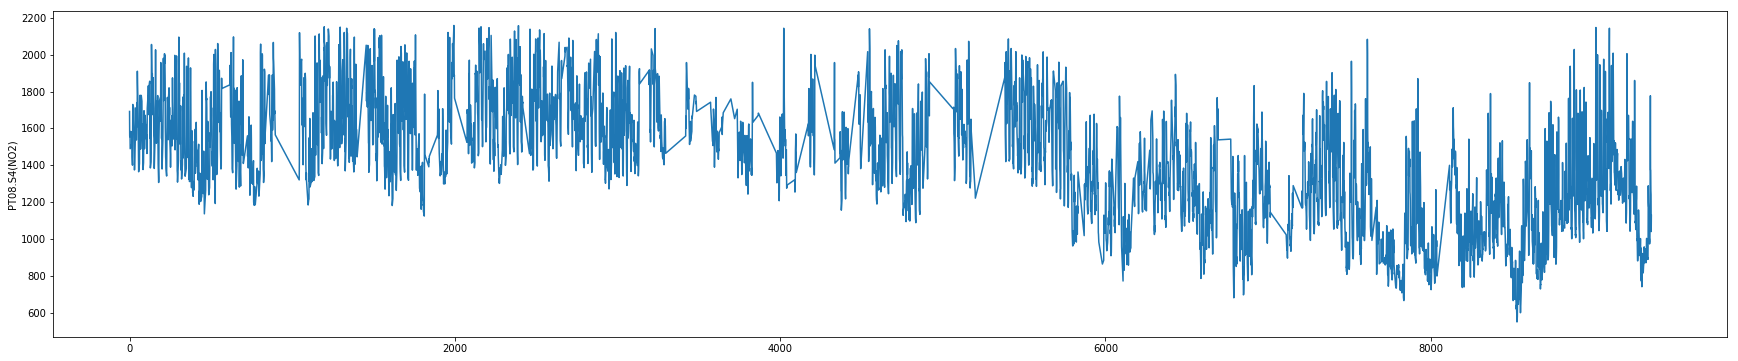

In [40]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['PT08.S4(NO2)'])
plt.ylabel('PT08.S4(NO2)')
plt.show()

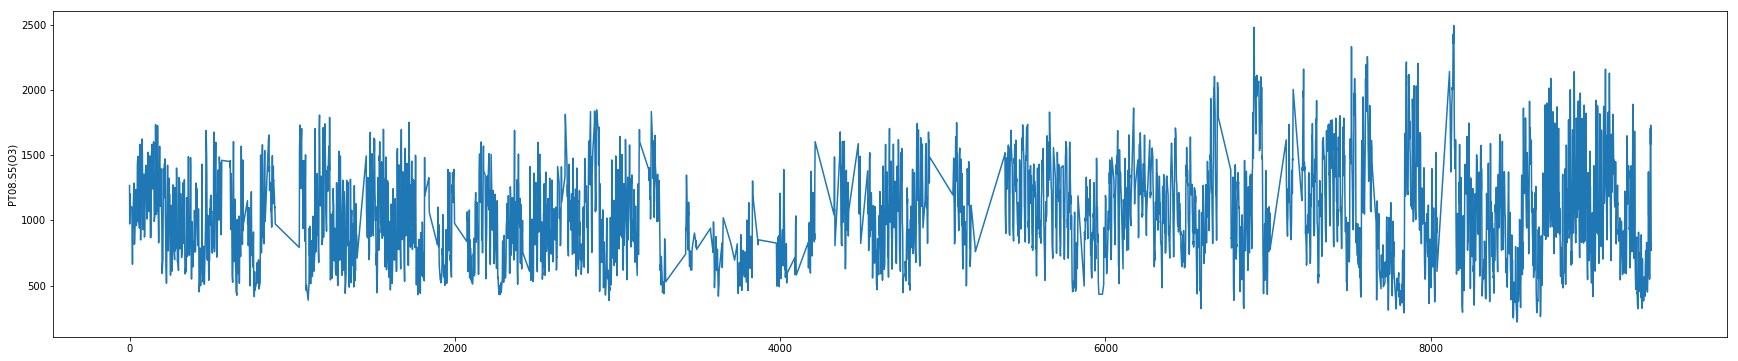

In [41]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['PT08.S5(O3)'])
plt.ylabel('PT08.S5(O3)')
plt.show()

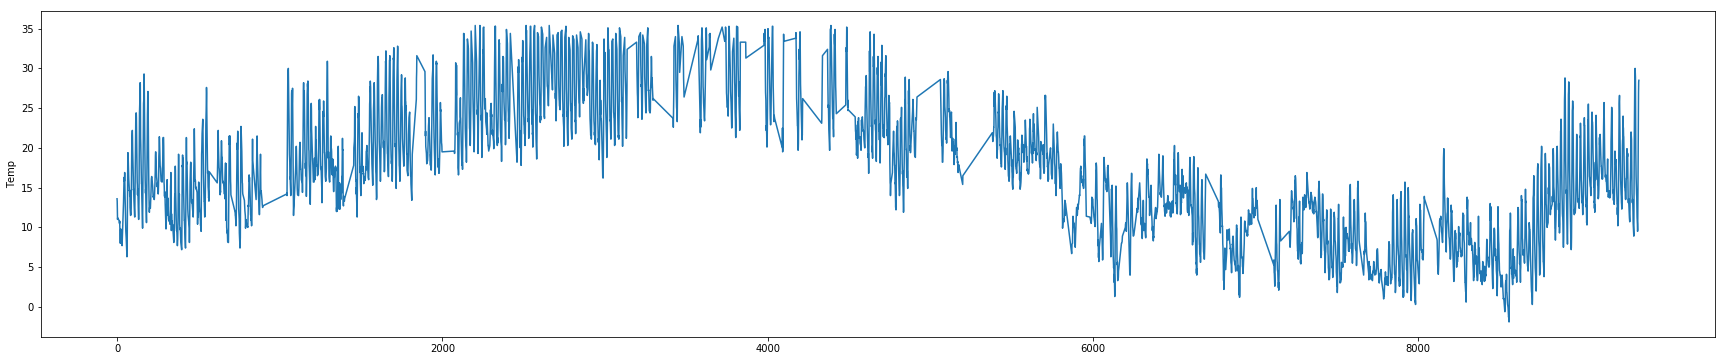

In [42]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['Temp'])
plt.ylabel('Temp')
plt.show()

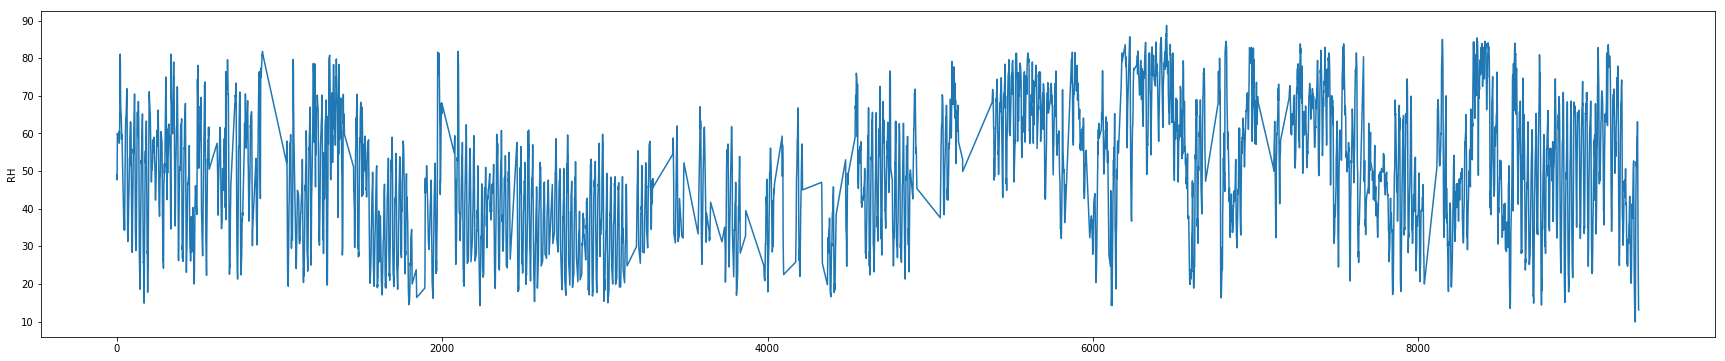

In [43]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['RH'])
plt.ylabel('RH')
plt.show()

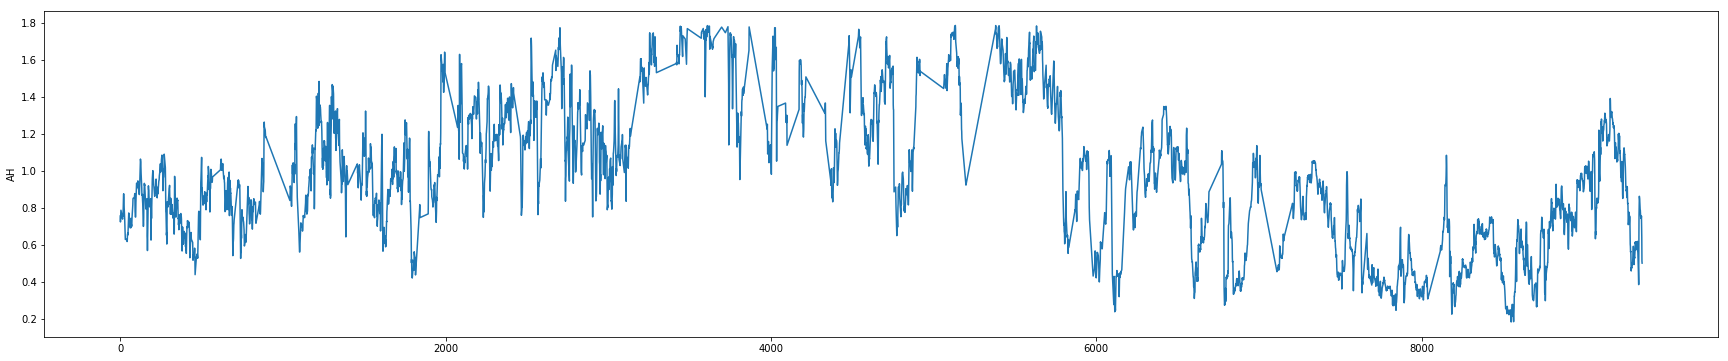

In [44]:
plt.figure(figsize=(30, 6))
plt.plot(air_quality_data['AH'])
plt.ylabel('AH')
plt.show()

### 4. Box and whisker plots

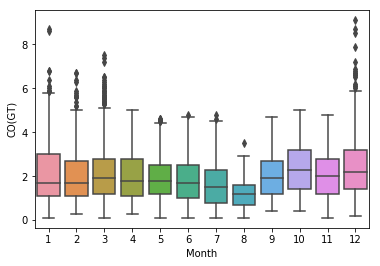

In [45]:
sns.boxplot(air_quality_data['Month'], air_quality_data['CO(GT)'])

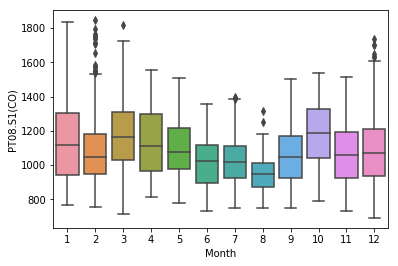

In [46]:
sns.boxplot(air_quality_data['Month'], air_quality_data['PT08.S1(CO)'])

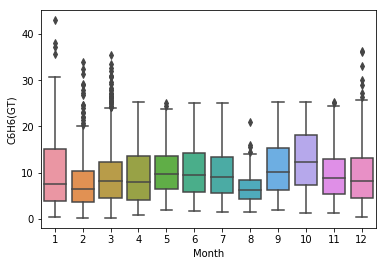

In [47]:
sns.boxplot(air_quality_data['Month'], air_quality_data['C6H6(GT)'])

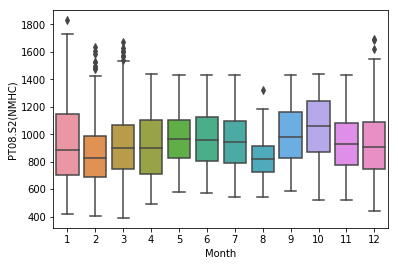

In [48]:
sns.boxplot(air_quality_data['Month'], air_quality_data['PT08.S2(NMHC)'])

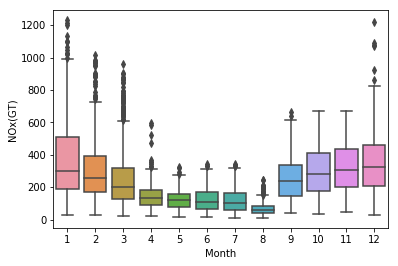

In [49]:
sns.boxplot(air_quality_data['Month'], air_quality_data['NOx(GT)'])

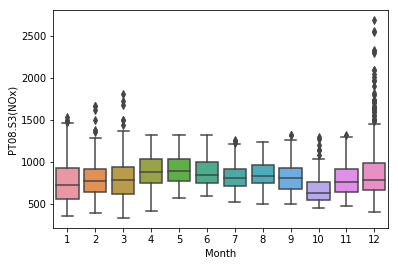

In [50]:
sns.boxplot(air_quality_data['Month'], air_quality_data['PT08.S3(NOx)'])

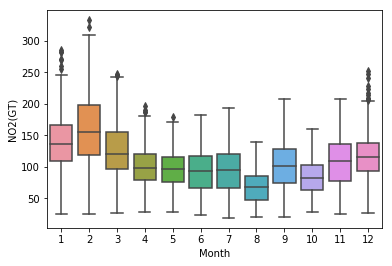

In [51]:
sns.boxplot(air_quality_data['Month'], air_quality_data['NO2(GT)'])

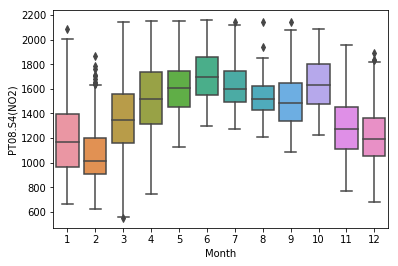

In [52]:
sns.boxplot(air_quality_data['Month'], air_quality_data['PT08.S4(NO2)'])

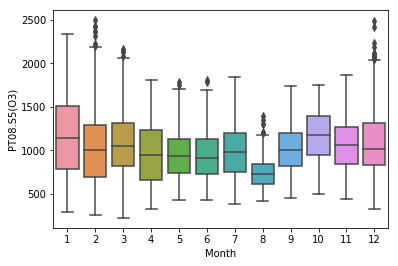

In [53]:
sns.boxplot(air_quality_data['Month'], air_quality_data['PT08.S5(O3)'])

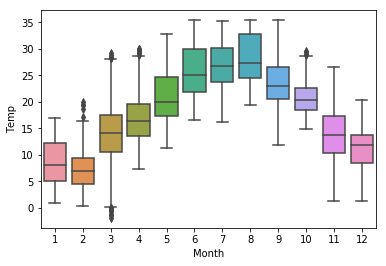

In [54]:
sns.boxplot(air_quality_data['Month'], air_quality_data['Temp'])

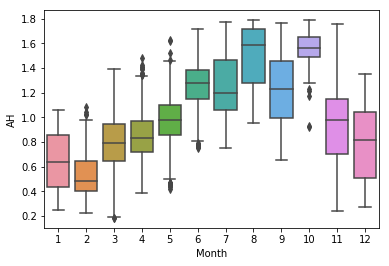

In [55]:
sns.boxplot(air_quality_data['Month'], air_quality_data['AH'])

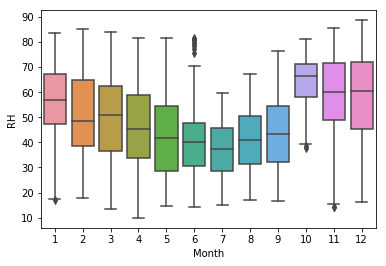

In [56]:
sns.boxplot(air_quality_data['Month'], air_quality_data['RH'])

### 5. Pairwise scatterplots (scatterplot matrices)  
There are a ton of variables in my dataset, if I use all of them to paint pairwise scatterplots, the diagram would be super huge, which is why I pick up several variables to describe pairwise scatterplots.

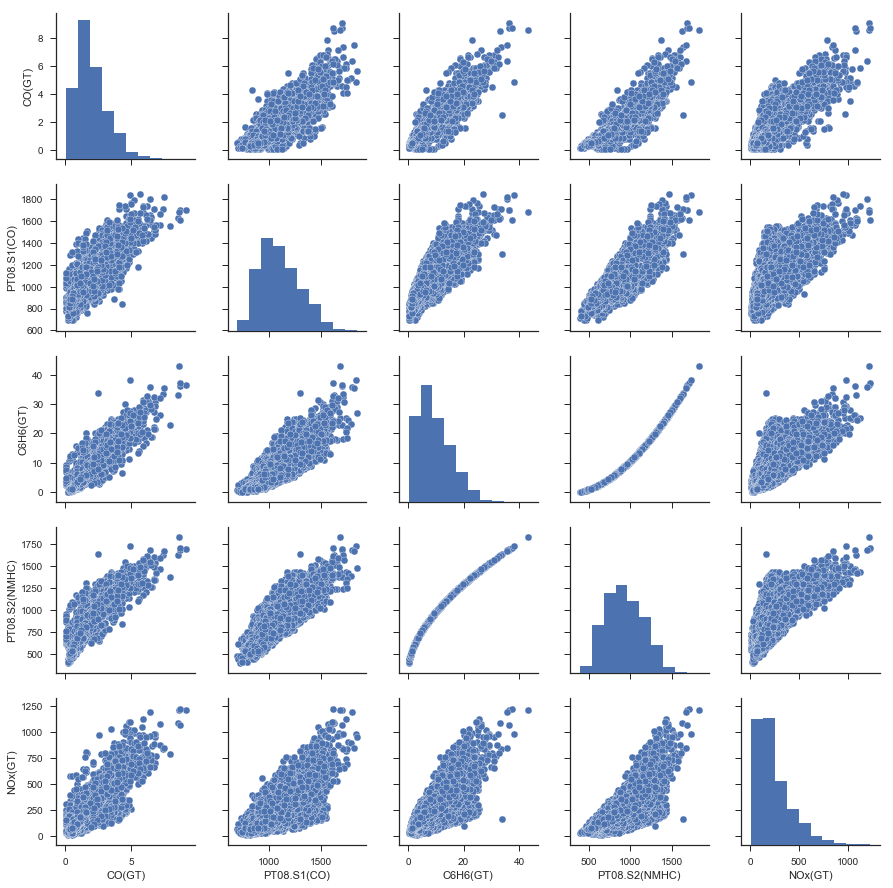

In [57]:
sns.set(style="ticks")
sns.pairplot(air_quality_data, vars=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)'])

### 6. How is the data distributed?  
By using distribution graph, I can count the value data distribution in the plot. The CO(GT), PT08.S1(CO), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT) and PT08.S5(O3)'s lines are leaned to left, which means that most of data located in the left side. However, the PT08.S4(NO2), Temp, RH and AH's lines are central tendency.

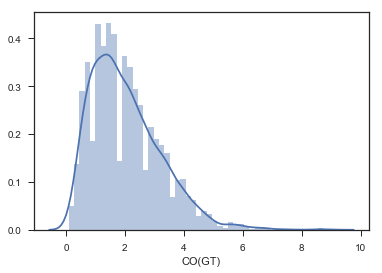

In [58]:
sns.distplot(air_quality_data['CO(GT)'])

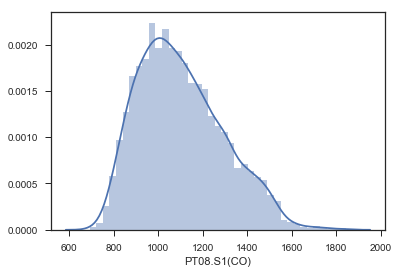

In [59]:
sns.distplot(air_quality_data['PT08.S1(CO)'])

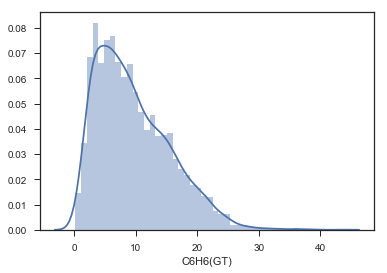

In [60]:
sns.distplot(air_quality_data['C6H6(GT)'])

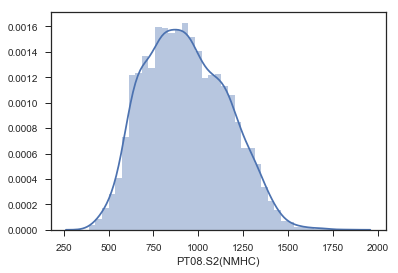

In [61]:
sns.distplot(air_quality_data['PT08.S2(NMHC)'])

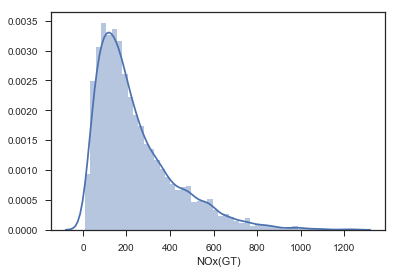

In [62]:
sns.distplot(air_quality_data['NOx(GT)'])

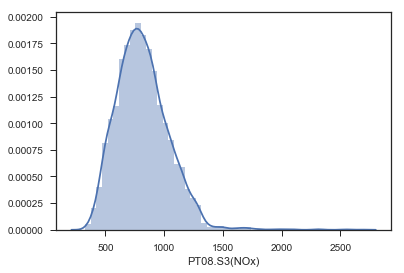

In [63]:
sns.distplot(air_quality_data['PT08.S3(NOx)'])

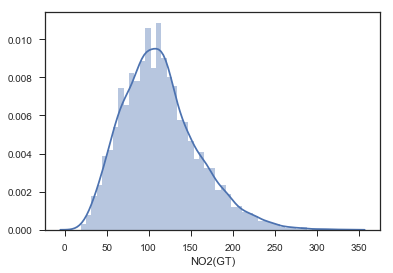

In [64]:
sns.distplot(air_quality_data['NO2(GT)'])

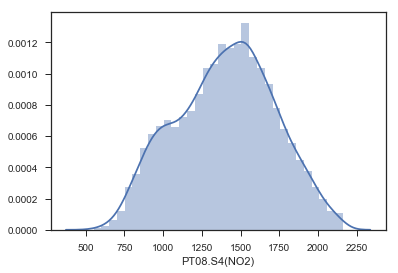

In [65]:
sns.distplot(air_quality_data['PT08.S4(NO2)'])

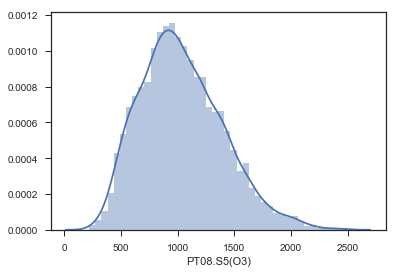

In [66]:
sns.distplot(air_quality_data['PT08.S5(O3)'])

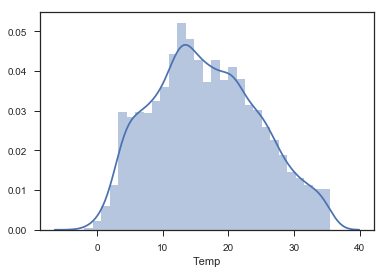

In [67]:
sns.distplot(air_quality_data['Temp'])

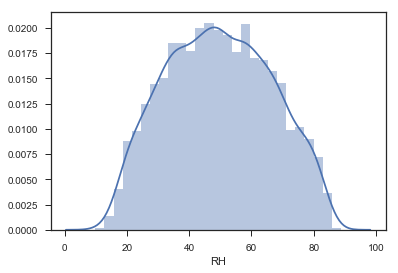

In [68]:
sns.distplot(air_quality_data['RH'])

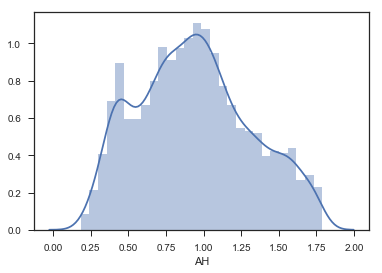

In [69]:
sns.distplot(air_quality_data['AH'])

### 7. What are the summary statistics?  
From the table below, I can know all information about the summary statistics.

In [70]:
air_quality_data.describe().T

count         mean         std       min         25%  \
Time           5831.0    11.924713    6.976289    0.0000     6.00000   
CO(GT)         5831.0     2.033013    1.187948    0.1000     1.10000   
PT08.S1(CO)    5831.0  1102.658035  191.149848  691.0000   956.50000   
C6H6(GT)       5831.0     9.608421    5.969737    0.2000     4.90000   
PT08.S2(NMHC)  5831.0   931.984222  226.964077  390.0000   758.50000   
NOx(GT)        5831.0   240.973589  180.665329   10.0000   110.00000   
PT08.S3(NOx)   5831.0   817.118676  222.640072  330.0000   661.00000   
NO2(GT)        5831.0   114.170468   45.157507   19.0000    82.00000   
PT08.S4(NO2)   5831.0  1401.494426  317.955248  551.0000  1172.00000   
PT08.S5(O3)    5831.0  1036.365975  364.243930  221.0000   774.00000   
Temp           5831.0    16.580089    8.037498   -1.9000    10.60000   
RH             5831.0    49.618127   16.885517    9.9000    36.30000   
AH             5831.0     0.938218    0.372909    0.1847     0.65985   
Month          5831.0     5.721660    3.552190    1.0000     3.00000   

                    50%         75%        max  
Time             12.000    18.00000    23.0000  
CO(GT)            1.800     2.70000     9.1000  
PT08.S1(CO)    1077.000  1228.00000  1846.0000  
C6H6(GT)          8.400    13.40000    43.0000  
PT08.S2(NMHC)   917.000  1098.00000  1831.0000  
NOx(GT)         188.000   323.00000  1230.0000  
PT08.S3(NOx)    797.000   947.00000  2683.0000  
NO2(GT)         110.000   140.00000   333.0000  
PT08.S4(NO2)   1417.000  1632.00000  2158.0000  
PT08.S5(O3)     999.000  1272.00000  2494.0000  
Temp             16.100    22.30000    35.4000  
RH               49.400    62.70000    88.7000  
AH                0.923     1.18835     1.7877  
Month             5.000     9.00000    12.0000

### 8. Plot each colmun as appropriate for the data type: Write a summary of what the plot tells you.  
From tables below, I can find that the most serious pollution happens at 10 am and 10 pm.

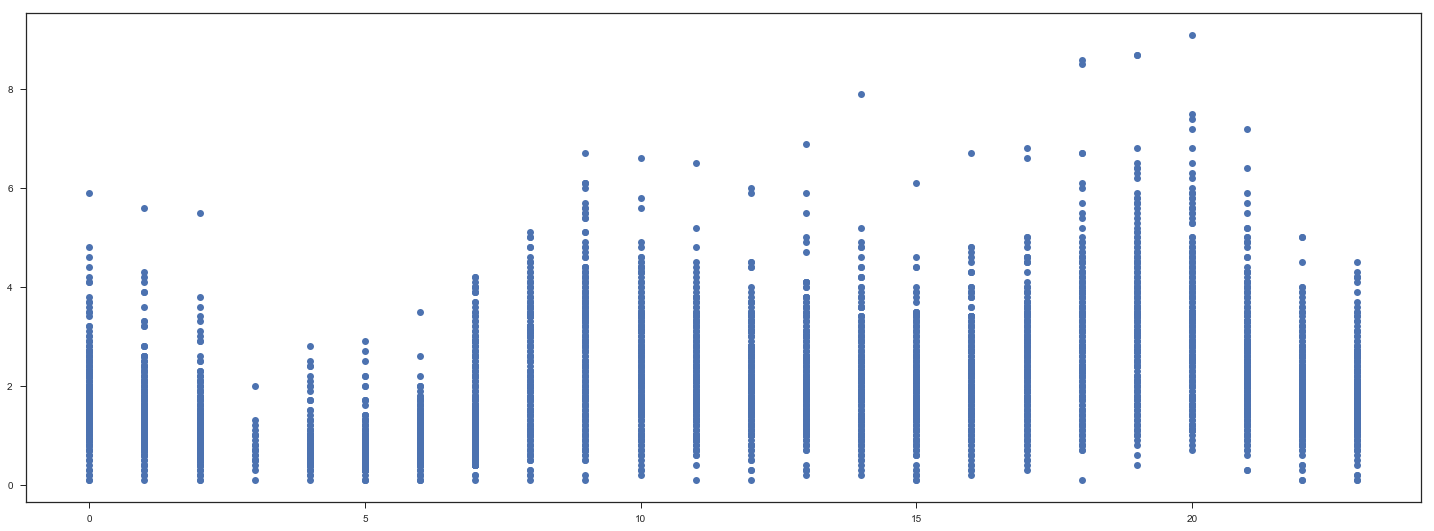

In [71]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['CO(GT)'], "o")

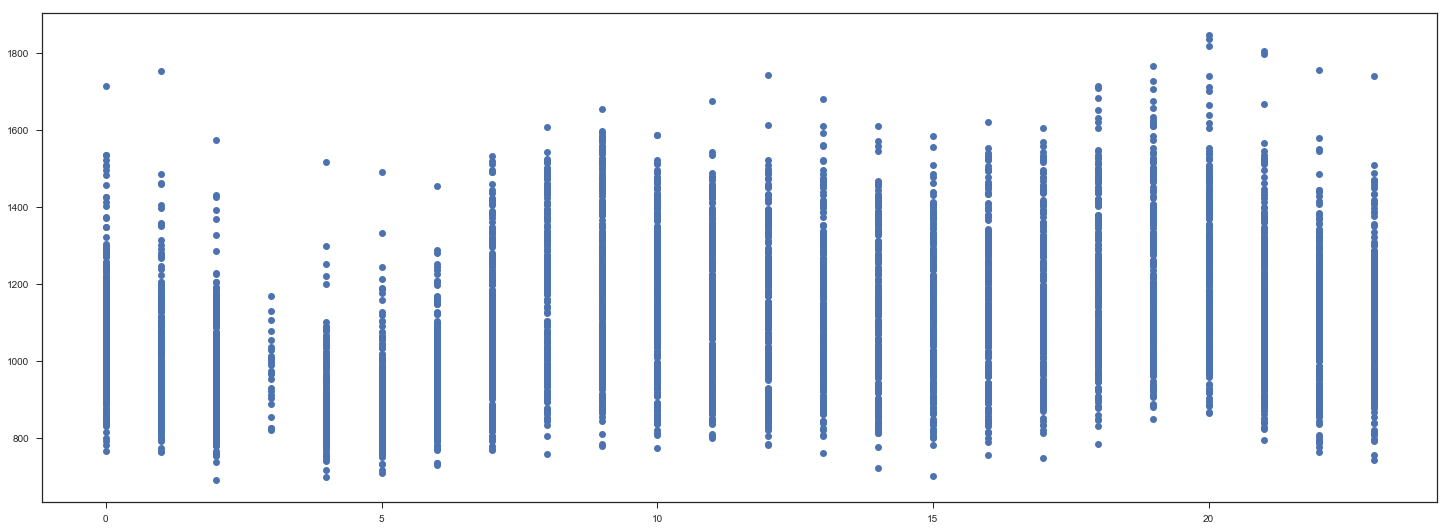

In [72]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['PT08.S1(CO)'], "o")

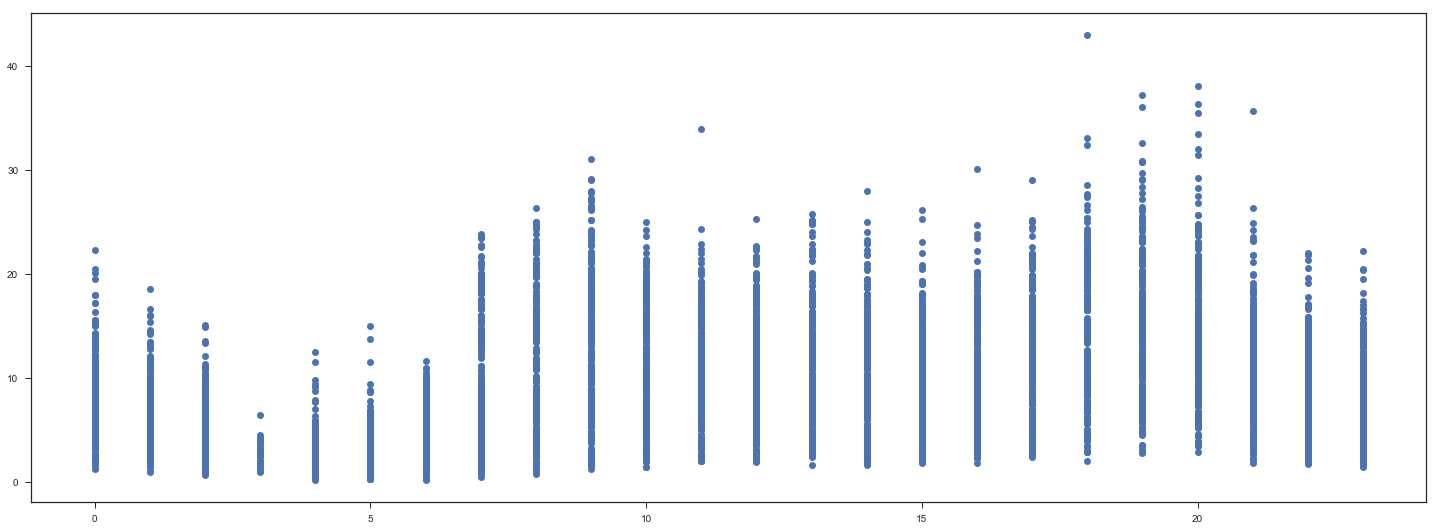

In [73]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['C6H6(GT)'], "o")

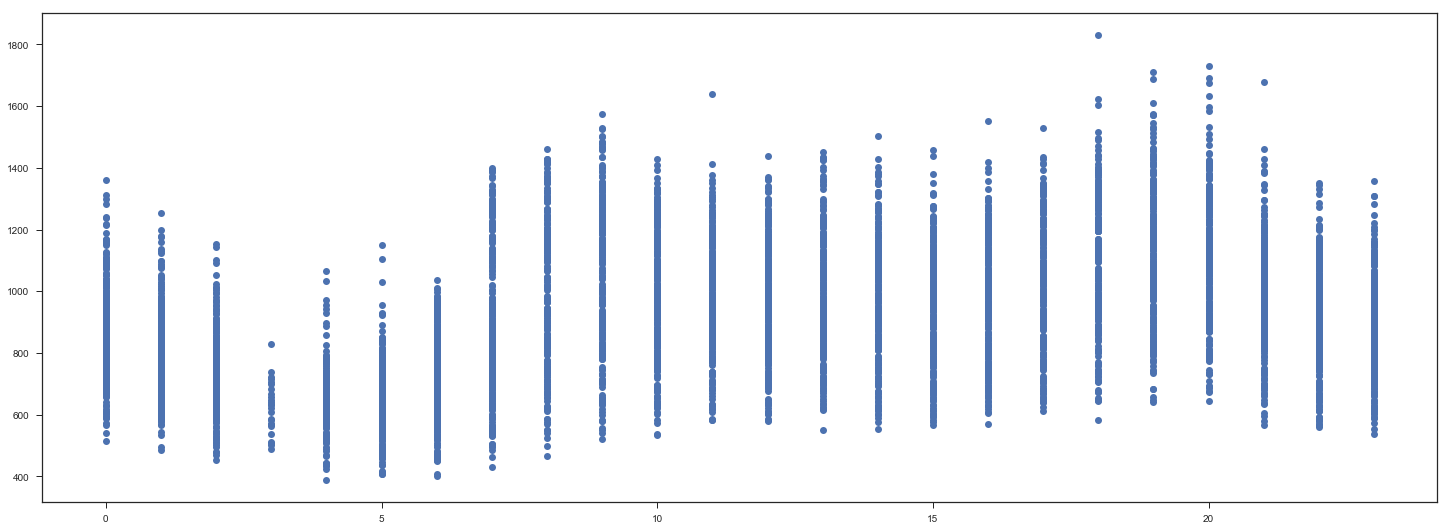

In [74]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['PT08.S2(NMHC)'], "o")

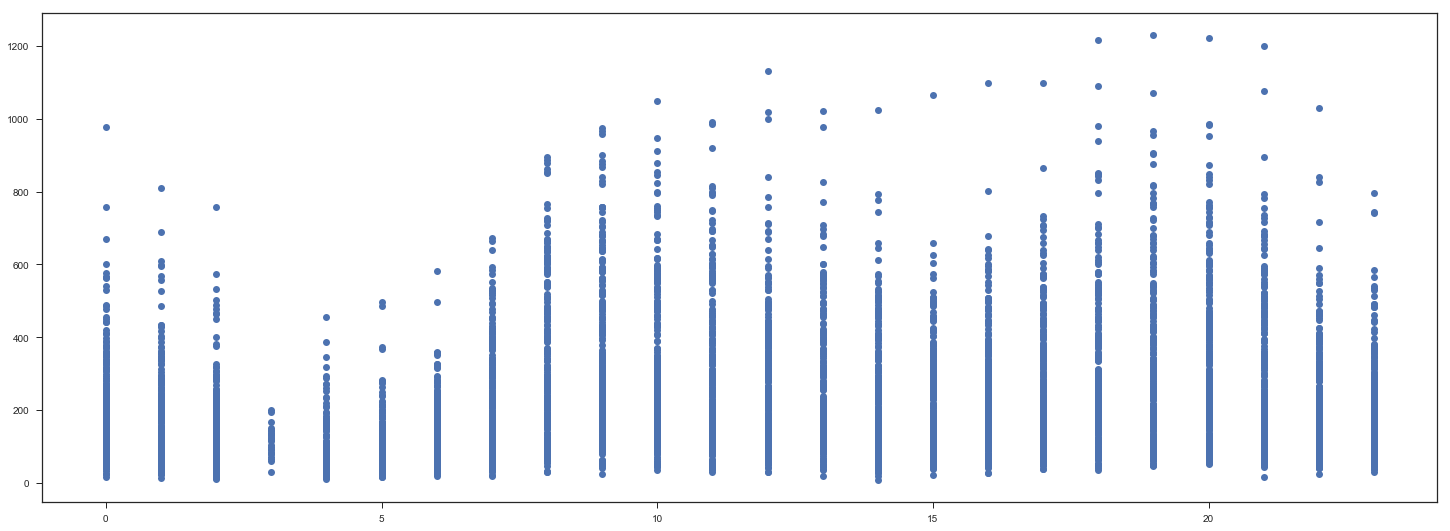

In [75]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['NOx(GT)'], "o")

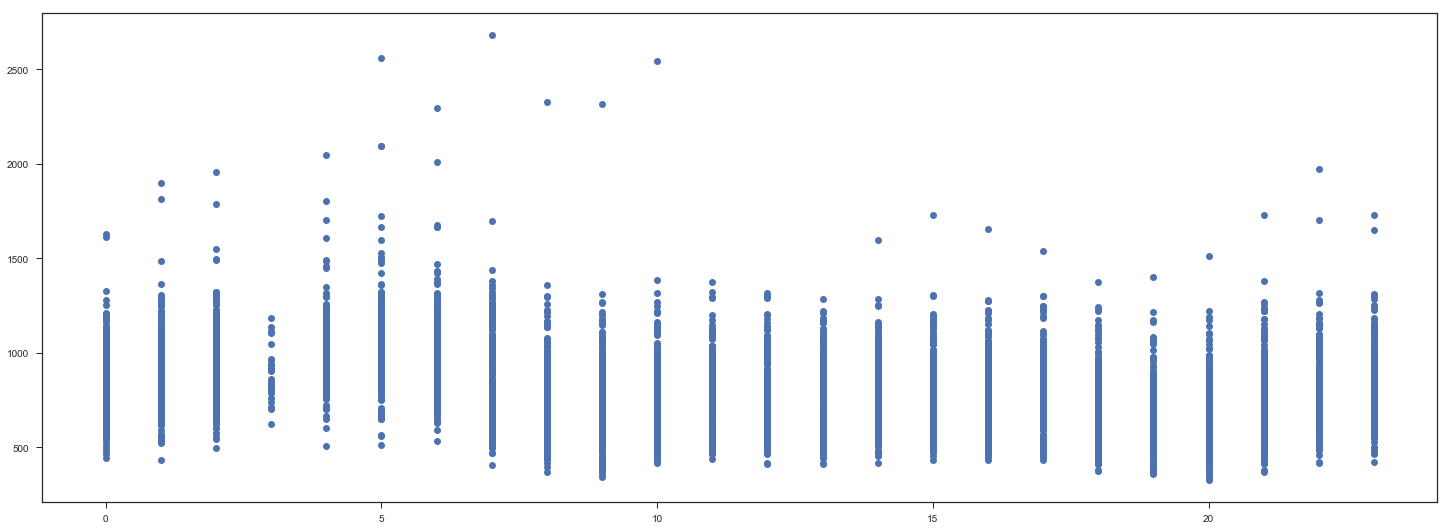

In [76]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['PT08.S3(NOx)'], "o")

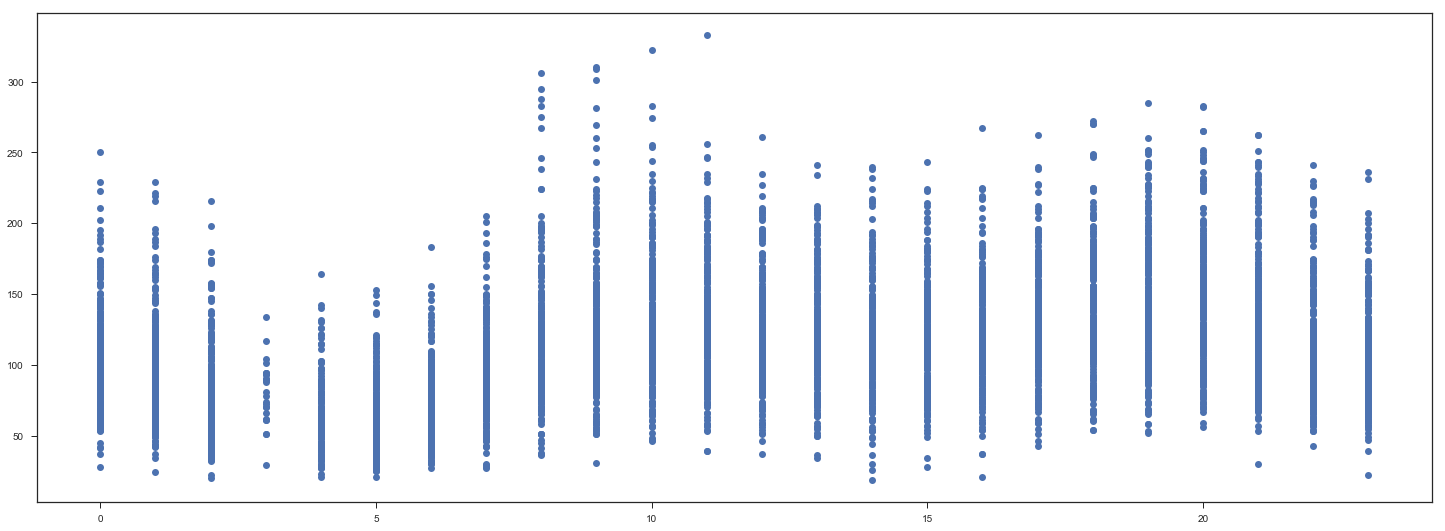

In [77]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['NO2(GT)'], "o")

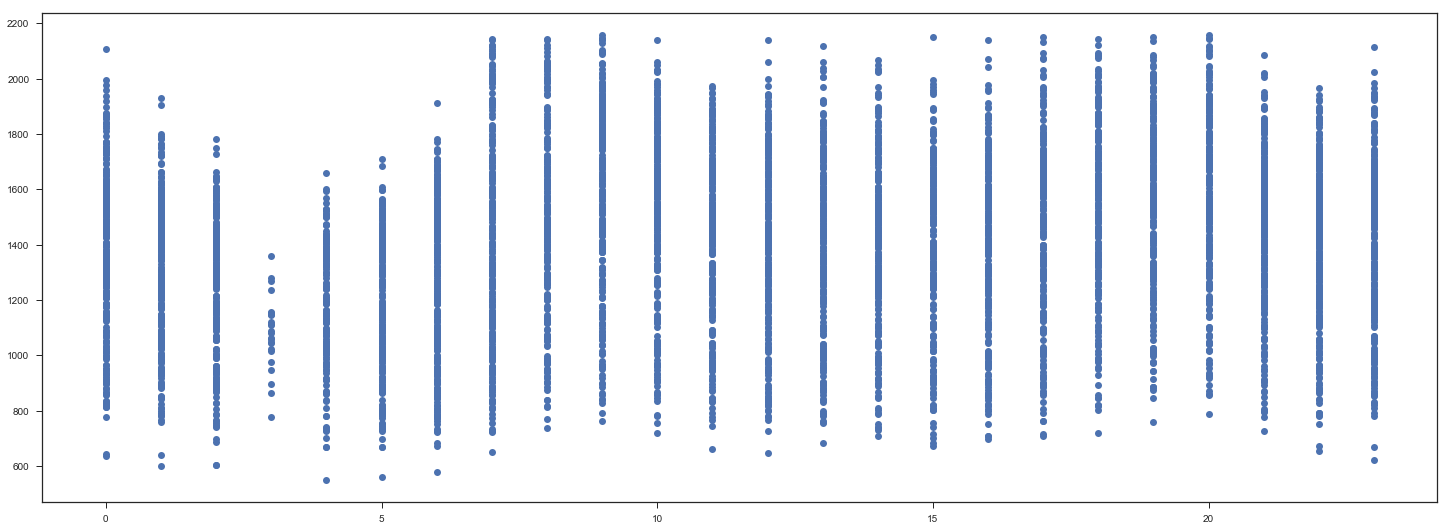

In [78]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['PT08.S4(NO2)'], "o")

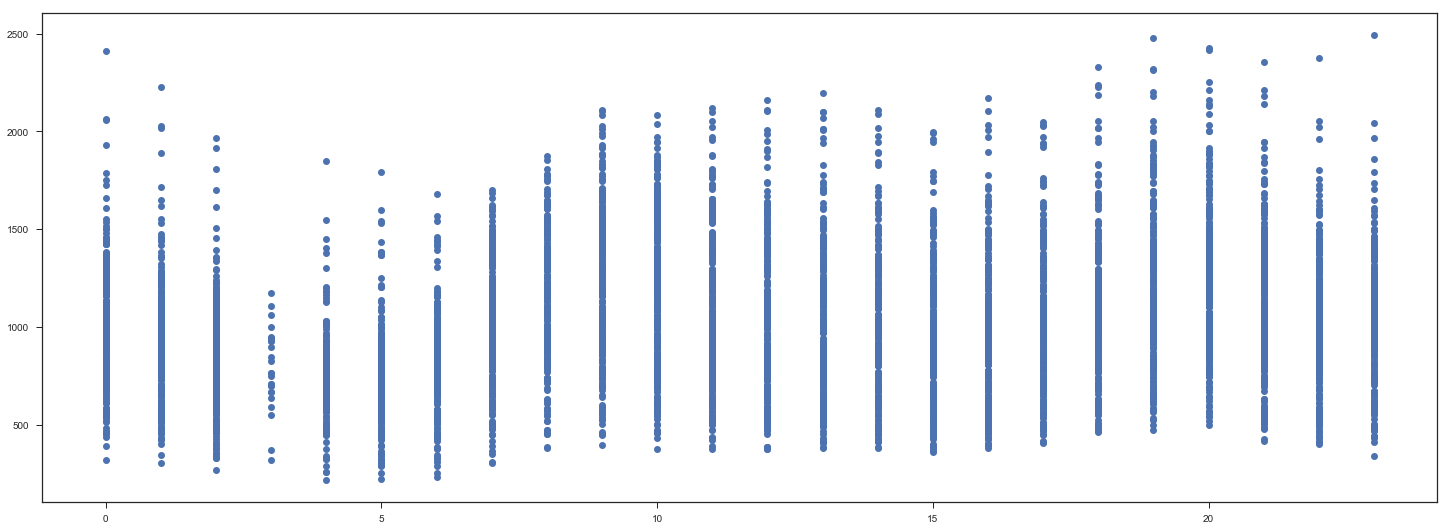

In [79]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['PT08.S5(O3)'], "o")

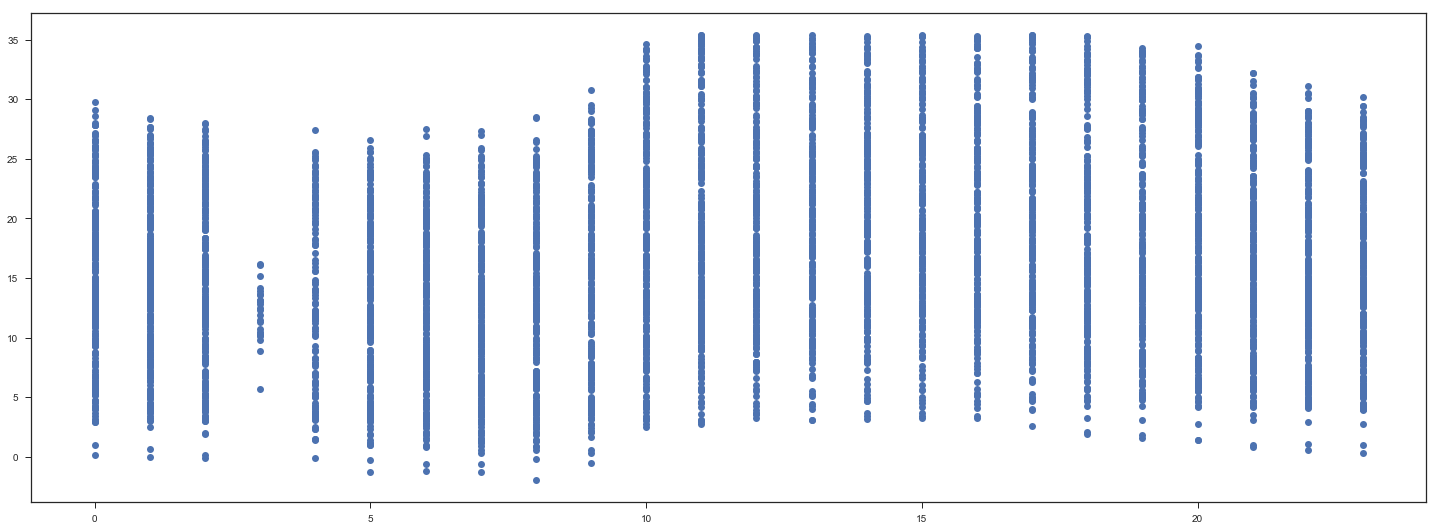

In [80]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['Temp'], "o")

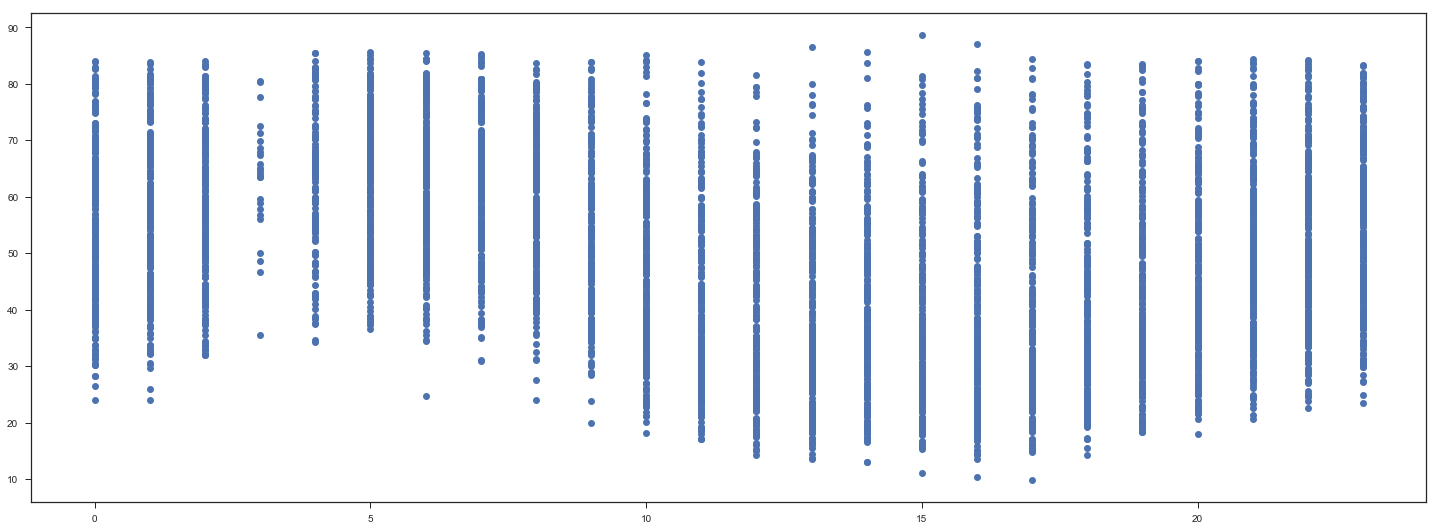

In [81]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['RH'], "o")

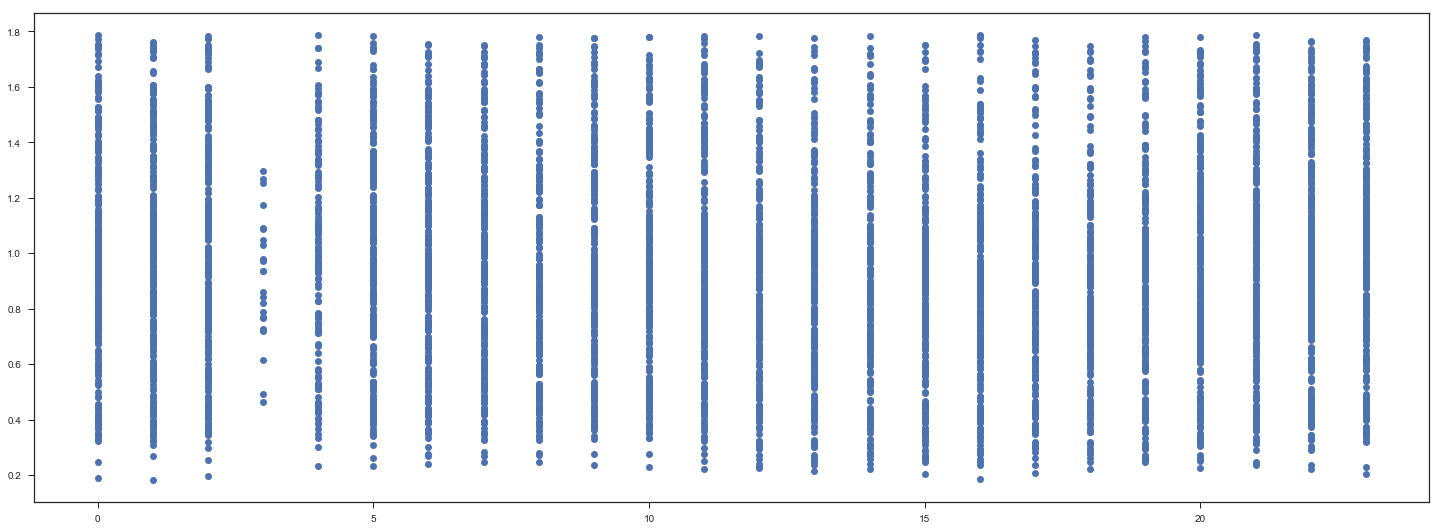

In [82]:
plt.figure(figsize=(25, 9))
plt.plot(air_quality_data['Time'], air_quality_data['AH'], "o")

In [83]:
air_quality_data.to_csv('data.csv', index=False)